## ISI Epilepsy Brno & Montreal Dataframes with H2o AutoML 

<u>**Goal:**</u> Conduct an exploratory data analysis with the prediction of outcome & pathology using H2o AutoML

17/8/2022

---

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import dataset

epilepsy = pd.read_csv('/Users/marek/Desktop/Marek/Jobs/ISI/Work/data/isi_data.csv')
# Remove unnamed column: ,index_col=0
epilepsy.head()

,Unnamed: 0,patient_id,channel_name,resected,structure,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,0,583,ra1,0,NaN,NON_SOZ,normal,11.0,0,11,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,1,583,ra2,0,NaN,NON_SOZ,normal,11.0,0,16,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,2,583,ra3,0,NaN,NON_SOZ,normal,11.0,0,20,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,3,583,ra4,0,NaN,NON_SOZ,normal,11.0,0,27,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,4,583,ra5,0,NaN,NON_SOZ,normal,11.0,0,11,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [4]:
# Drop index column

epilepsy = epilepsy.loc[:, ~epilepsy.columns.str.contains('^Unnamed')]
epilepsy.head()

,patient_id,channel_name,resected,structure,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NaN,NON_SOZ,normal,11.0,0,11,34,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NaN,NON_SOZ,normal,11.0,0,16,40,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NaN,NON_SOZ,normal,11.0,0,20,35,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NaN,NON_SOZ,normal,11.0,0,27,37,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NaN,NON_SOZ,normal,11.0,0,11,58,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [5]:
# Remove unnecessary columns

epilepsy = epilepsy.drop(['structure'], axis=1)
epilepsy.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,normal,11.0,0,11,34,22,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NON_SOZ,normal,11.0,0,16,40,49,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NON_SOZ,normal,11.0,0,20,35,61,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NON_SOZ,normal,11.0,0,27,37,66,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NON_SOZ,normal,11.0,0,11,58,63,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [6]:
# Split epilepsy dataset to Montreal & Brno dataframe

df_montreal, df_brno = [x for _, x in epilepsy.groupby(epilepsy['patient_id'] < 100)]

In [7]:
# Show Brno dataframe

df_brno.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
2723,59,c'1,0,NON_SOZ,normal,31.0,0,1,0,1,...,0.85799,0.242008,0.042108,0.195079,0.0,0.0,0.0,0.762719,0,0
2724,59,c'10,0,NON_SOZ,normal,31.0,0,17,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2725,59,c'11,0,NON_SOZ,normal,31.0,0,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2726,59,c'12,0,NON_SOZ,normal,31.0,0,2,1,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2727,59,c'13,0,NON_SOZ,normal,31.0,0,12,17,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [8]:
# Show unique Brno patient_id

df_brno.patient_id.unique()

array([59, 61, 63, 66, 67, 69, 71, 73, 74, 77, 80, 81, 82, 84, 88, 89, 90,
       92, 93], dtype=int64)

In [9]:
# Number of patients in Brno

df_brno['patient_id'].nunique()

19

In [10]:
# Number of entries per patient in Brno

df_brno['patient_id'].value_counts().sort_index()

59    2496
61    2416
63    1920
66    2800
67    2464
69    2720
71    2704
73    2816
74    2784
77    2688
80    2624
81    2624
82    1360
84    2768
88    2800
89    2720
90    2816
92    2816
93    2560
Name: patient_id, dtype: int64

In [11]:
# Unique value of outcome per patient in Brno

outcomes_brno = df_brno.groupby(['patient_id'])['outcome'].unique().sort_index()
outcomes_brno

patient_id
59    [31.0]
61    [11.0]
63    [11.0]
66    [41.0]
67    [42.0]
69    [31.0]
71    [11.0]
73    [31.0]
74    [22.0]
77    [11.0]
80    [31.0]
81    [31.0]
82    [11.0]
84    [12.0]
88    [21.0]
89    [11.0]
90    [31.0]
92    [31.0]
93    [11.0]
Name: outcome, dtype: object

In [12]:
# Values & counts of outcomes in Brno

values_brno, counts_brno = np.unique(outcomes_brno, return_counts=True)
values_brno, counts_brno

(array([array([11.]), array([12.]), array([21.]), array([22.]),
        array([31.]), array([41.]), array([42.])], dtype=object),
 array([7, 1, 1, 1, 7, 1, 1], dtype=int64))

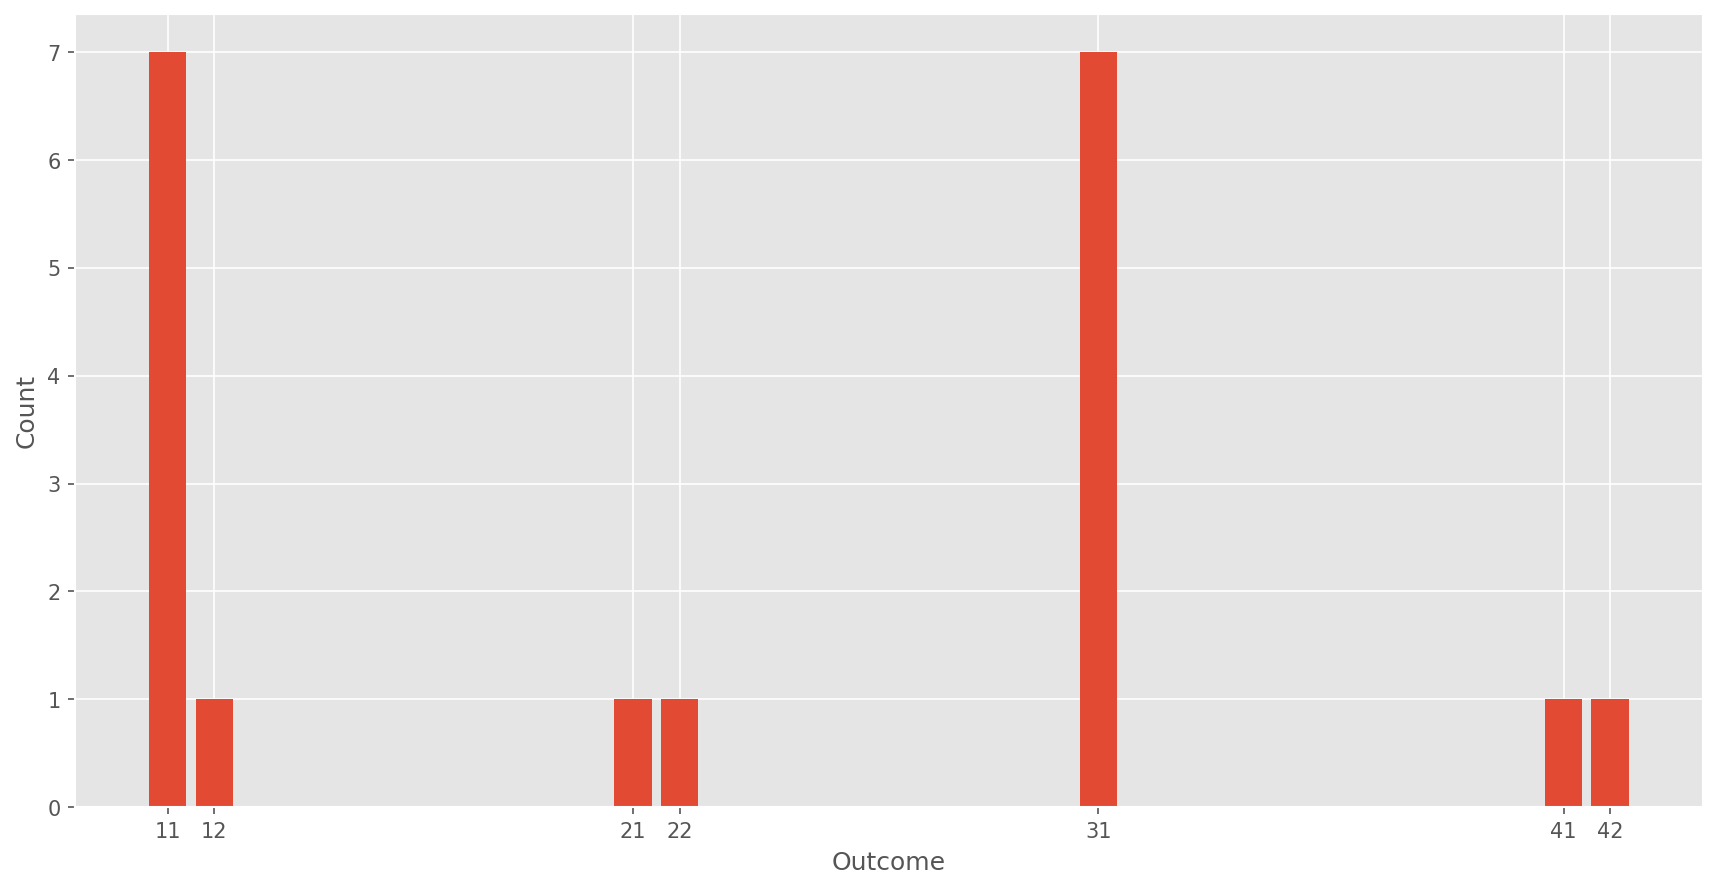

In [14]:
# Show count of outcomes in Brno 

plt.bar(values_brno, counts_brno)
plt.style.use('ggplot')
plt.xticks([11,12,21,22,31,41,42])
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 150
plt.ylabel("Count")
plt.xlabel("Outcome");

In [15]:
# Columns names in Brno dataframe

cols_brno = df_brno.columns
print(list(cols_brno))

['patient_id', 'channel_name', 'resected', 'onset_channel', 'pathology', 'outcome', 'HFO_65.0-80.0', 'HFO_80.0-250.0', 'HFO_250.0-600.0', 'spike_rate', 'power_1.0-4.0', 'power_4.0-8.0', 'power_8.0-12.0', 'power_12.0-20.0', 'power_20.0-45.0', 'power_65.0-80.0', 'power_80.0-250.0', 'power_250.0-600.0', 'hlx_0.0-0.0', 'hlx_1.0-4.0', 'hlx_4.0-8.0', 'hlx_8.0-12.0', 'hlx_12.0-20.0', 'hlx_20.0-45.0', 'hlx_65.0-80.0', 'hlx_80.0-250.0', 'hlx_250.0-600.0', 'pse', 'pac', 'fac', 'lfr', 'lin_corr_median_0.0-0.0', 'ren_0.0-0.0', 'phase_sync_0.0-0.0', 'phase_const_0.0-0.0', 'pli_0.0-0.0', 'pli_tau_0.0-0.0', 'coherence_0.0-0.0', 'lin_corr_median_1.0-4.0', 'ren_1.0-4.0', 'phase_sync_1.0-4.0', 'phase_const_1.0-4.0', 'pli_1.0-4.0', 'pli_tau_1.0-4.0', 'coherence_1.0-4.0', 'lin_corr_median_4.0-8.0', 'ren_4.0-8.0', 'phase_sync_4.0-8.0', 'phase_const_4.0-8.0', 'pli_4.0-8.0', 'pli_tau_4.0-8.0', 'coherence_4.0-8.0', 'lin_corr_median_8.0-12.0', 'ren_8.0-12.0', 'phase_sync_8.0-12.0', 'phase_const_8.0-12.0', 'pli

In [16]:
# Drop columns no. 2, 3 and 6

df_brno_drop = df_brno.drop(df_brno.columns[[2, 3, 6]], axis=1)

In [17]:
# Drop df_brno dataframe view

df_brno_drop.head()

,patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
2723,59,c'1,normal,31.0,1,0,1,0.065559,0.028801,0.017564,...,0.85799,0.242008,0.042108,0.195079,0.0,0.0,0.0,0.762719,0,0
2724,59,c'10,normal,31.0,17,2,4,0.085462,0.029390,0.013196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2725,59,c'11,normal,31.0,4,2,1,0.106158,0.061141,0.035746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2726,59,c'12,normal,31.0,2,1,21,0.062689,0.048549,0.026680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2727,59,c'13,normal,31.0,12,17,31,0.163848,0.058202,0.028081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


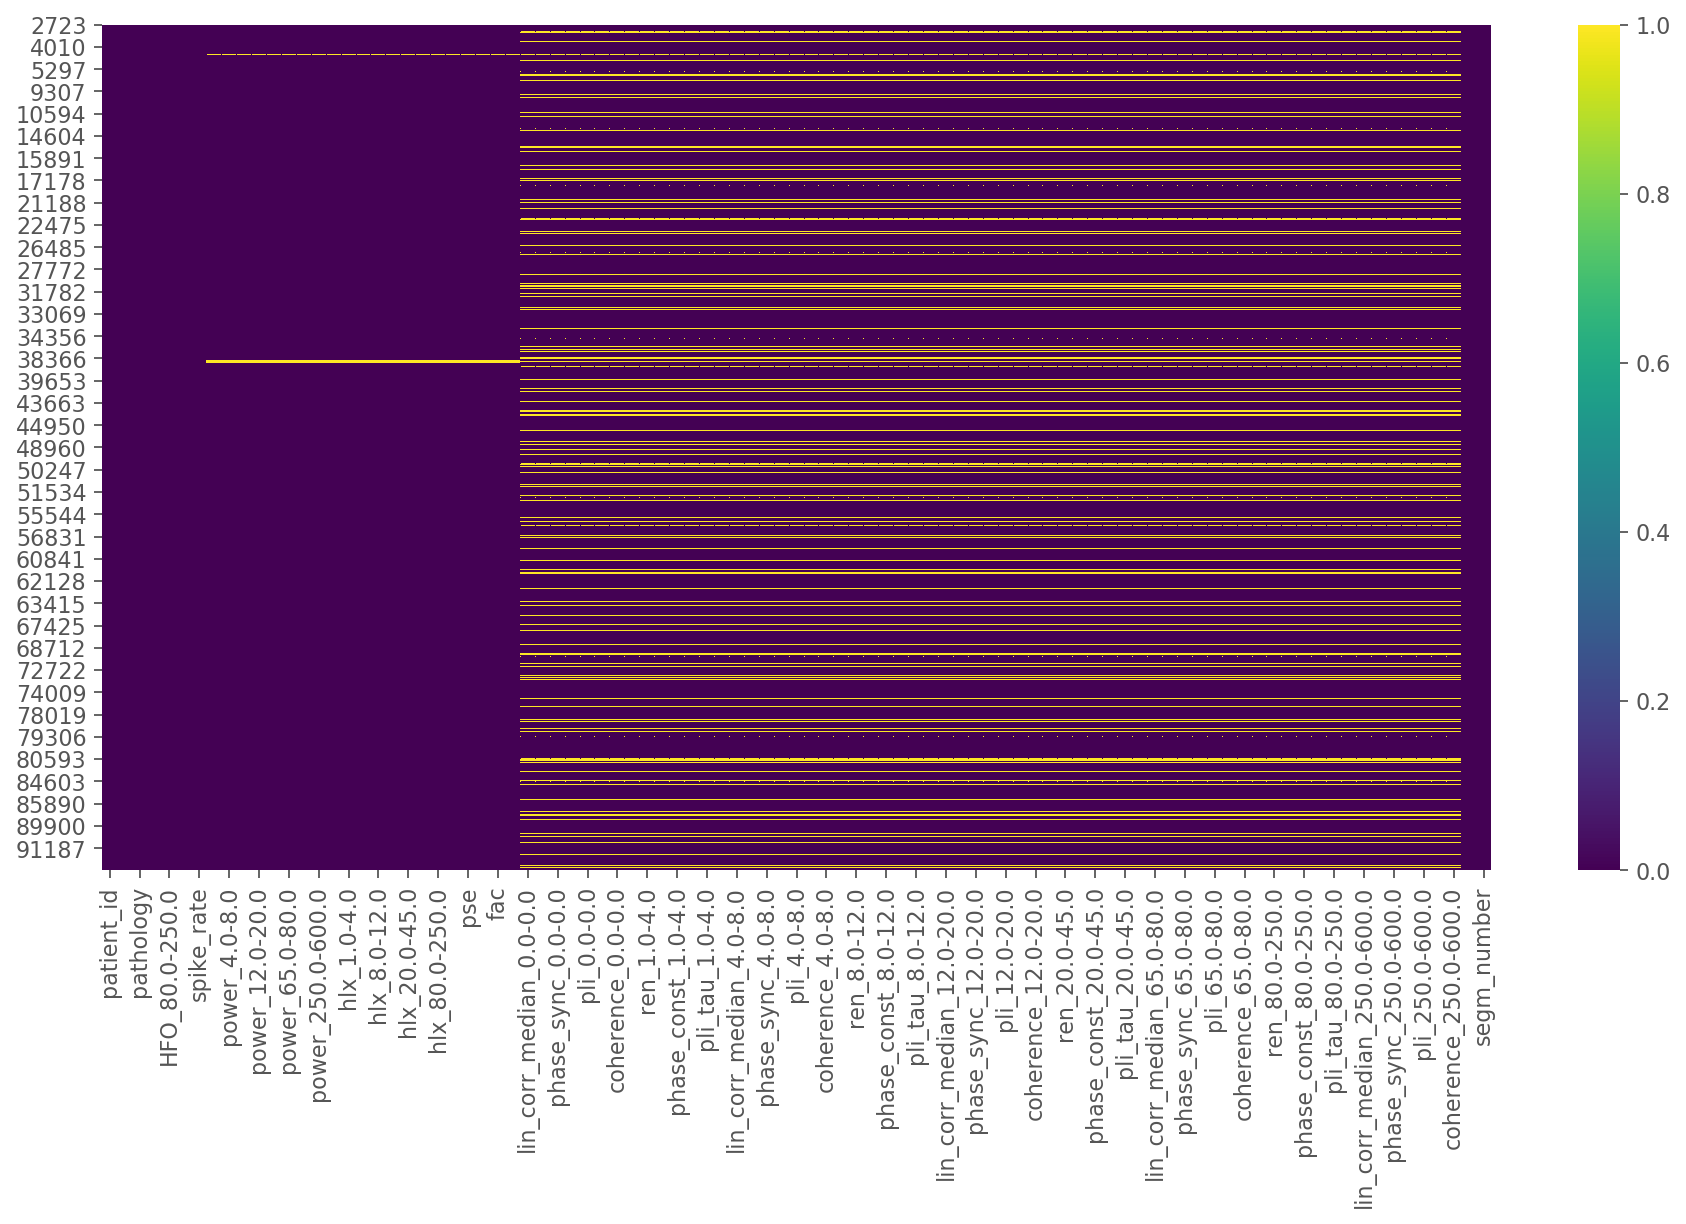

In [18]:
# Show null columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 160
sns.heatmap(df_brno_drop.isnull(), cmap = 'viridis', cbar = True);

In [19]:
# Show Montreal dataframe

df_montreal.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,normal,11.0,0,11,34,22,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NON_SOZ,normal,11.0,0,16,40,49,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NON_SOZ,normal,11.0,0,20,35,61,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NON_SOZ,normal,11.0,0,27,37,66,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NON_SOZ,normal,11.0,0,11,58,63,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [20]:
# Show unique Montreal patient_id

df_montreal.patient_id.unique()

array([ 583,  705,  657,  756,  777, 1299, 1446,  761, 1162,  953,  965,
       1002,  873, 1020, 1021, 1029, 1149, 1041, 1159, 1142, 1247, 1233,
        723, 1153, 1246,  617,  909, 1016, 1043,  717,  473, 1218, 1630,
       1718], dtype=int64)

In [21]:
# Number of patients in Montreal

df_montreal['patient_id'].nunique()

34

In [22]:
# Number of entries per patient in Montreal

df_montreal['patient_id'].value_counts().sort_index()

473     1136
583     1392
617      880
657      720
705     1360
717     1136
723     1376
756      912
761     1840
777      576
873     1392
909     1008
953     1408
965     1376
1002    1072
1016    1600
1020     800
1021     944
1029    1456
1041    1712
1043    1136
1142    1408
1149     912
1153    1648
1159    1152
1162     784
1218    1600
1233     848
1246    1744
1247    1392
1299    1232
1446     800
1630    2736
1718    2080
Name: patient_id, dtype: int64

In [23]:
# Unique value of outcome per patient in Montreal

outcomes_montreal = df_montreal.groupby(['patient_id'])['outcome'].unique().sort_index()
outcomes_montreal

patient_id
473     [31.0]
583     [11.0]
617     [31.0]
657     [11.0]
705     [41.0]
717     [11.0]
723     [11.0]
756     [22.0]
761     [41.0]
777     [41.0]
873     [12.0]
909     [32.0]
953     [11.0]
965     [11.0]
1002    [11.0]
1016    [41.0]
1020    [32.0]
1021    [11.0]
1029    [41.0]
1041    [11.0]
1043    [11.0]
1142    [31.0]
1149    [21.0]
1153    [14.0]
1159    [31.0]
1162    [41.0]
1218    [41.0]
1233    [12.0]
1246    [12.0]
1247    [42.0]
1299    [42.0]
1446    [31.0]
1630    [11.0]
1718    [12.0]
Name: outcome, dtype: object

In [24]:
# Values & counts of outcomes in Montreal

values_montreal, counts_montreal = np.unique(outcomes_montreal, return_counts=True)
values_montreal, counts_montreal

(array([array([11.]), array([12.]), array([14.]), array([21.]),
        array([22.]), array([31.]), array([32.]), array([41.]),
        array([42.])], dtype=object),
 array([11,  4,  1,  1,  1,  5,  2,  7,  2], dtype=int64))

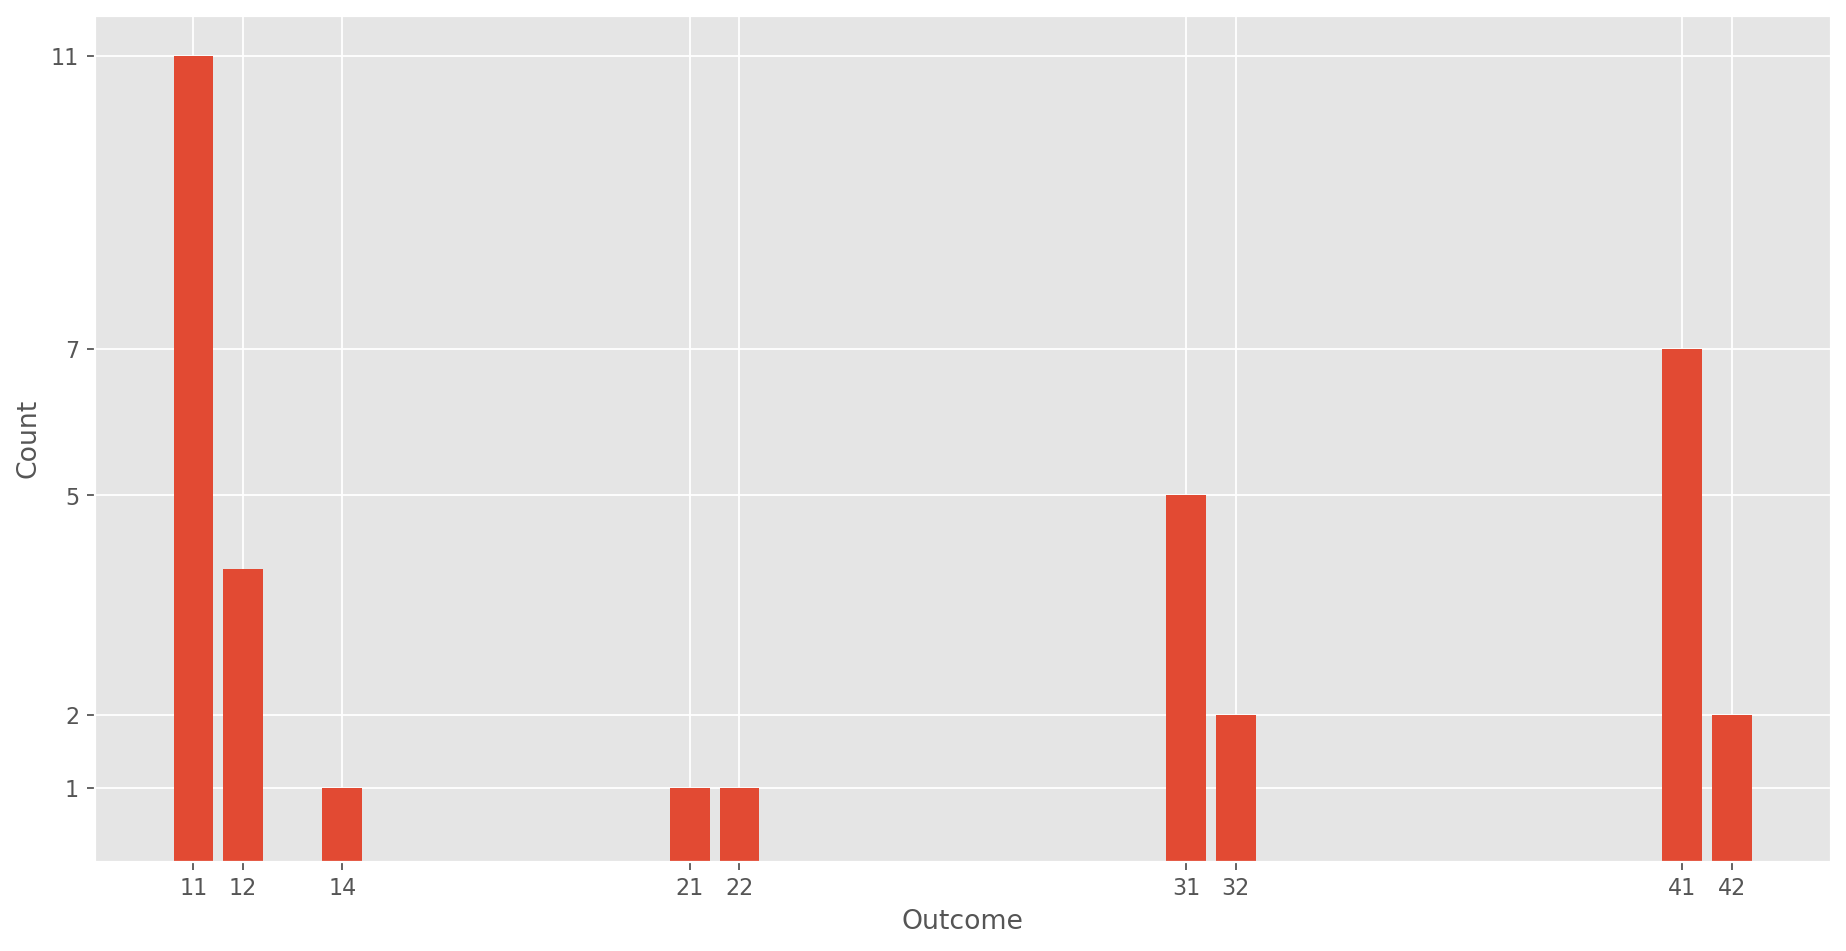

In [25]:
# Show count of outcomes in Montreal

plt.bar(values_montreal, counts_montreal)
plt.style.use('ggplot')
plt.xticks([11,12,14,21,22,31,32,41,42])
plt.yticks([1,2,5,7,11])
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 150
plt.ylabel("Count")
plt.xlabel("Outcome");

In [26]:
# Columns names in Montreal dataframe

cols_montreal = df_brno.columns
print(list(cols_montreal))

['patient_id', 'channel_name', 'resected', 'onset_channel', 'pathology', 'outcome', 'HFO_65.0-80.0', 'HFO_80.0-250.0', 'HFO_250.0-600.0', 'spike_rate', 'power_1.0-4.0', 'power_4.0-8.0', 'power_8.0-12.0', 'power_12.0-20.0', 'power_20.0-45.0', 'power_65.0-80.0', 'power_80.0-250.0', 'power_250.0-600.0', 'hlx_0.0-0.0', 'hlx_1.0-4.0', 'hlx_4.0-8.0', 'hlx_8.0-12.0', 'hlx_12.0-20.0', 'hlx_20.0-45.0', 'hlx_65.0-80.0', 'hlx_80.0-250.0', 'hlx_250.0-600.0', 'pse', 'pac', 'fac', 'lfr', 'lin_corr_median_0.0-0.0', 'ren_0.0-0.0', 'phase_sync_0.0-0.0', 'phase_const_0.0-0.0', 'pli_0.0-0.0', 'pli_tau_0.0-0.0', 'coherence_0.0-0.0', 'lin_corr_median_1.0-4.0', 'ren_1.0-4.0', 'phase_sync_1.0-4.0', 'phase_const_1.0-4.0', 'pli_1.0-4.0', 'pli_tau_1.0-4.0', 'coherence_1.0-4.0', 'lin_corr_median_4.0-8.0', 'ren_4.0-8.0', 'phase_sync_4.0-8.0', 'phase_const_4.0-8.0', 'pli_4.0-8.0', 'pli_tau_4.0-8.0', 'coherence_4.0-8.0', 'lin_corr_median_8.0-12.0', 'ren_8.0-12.0', 'phase_sync_8.0-12.0', 'phase_const_8.0-12.0', 'pli

In [27]:
# Drop columns no. 2, 3 and 6

df_montreal_drop = df_montreal.drop(df_montreal.columns[[2, 3, 6]], axis=1)

In [28]:
# Drop df_montreal dataframe view

df_montreal_drop.head()

,patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,normal,11.0,11,34,22,0.533375,0.781969,1.122708,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,normal,11.0,16,40,49,0.518898,0.780688,1.058996,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,normal,11.0,20,35,61,0.466505,0.740345,0.904850,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,normal,11.0,27,37,66,0.444008,0.721173,0.815821,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,normal,11.0,11,58,63,0.588096,0.937518,1.067615,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


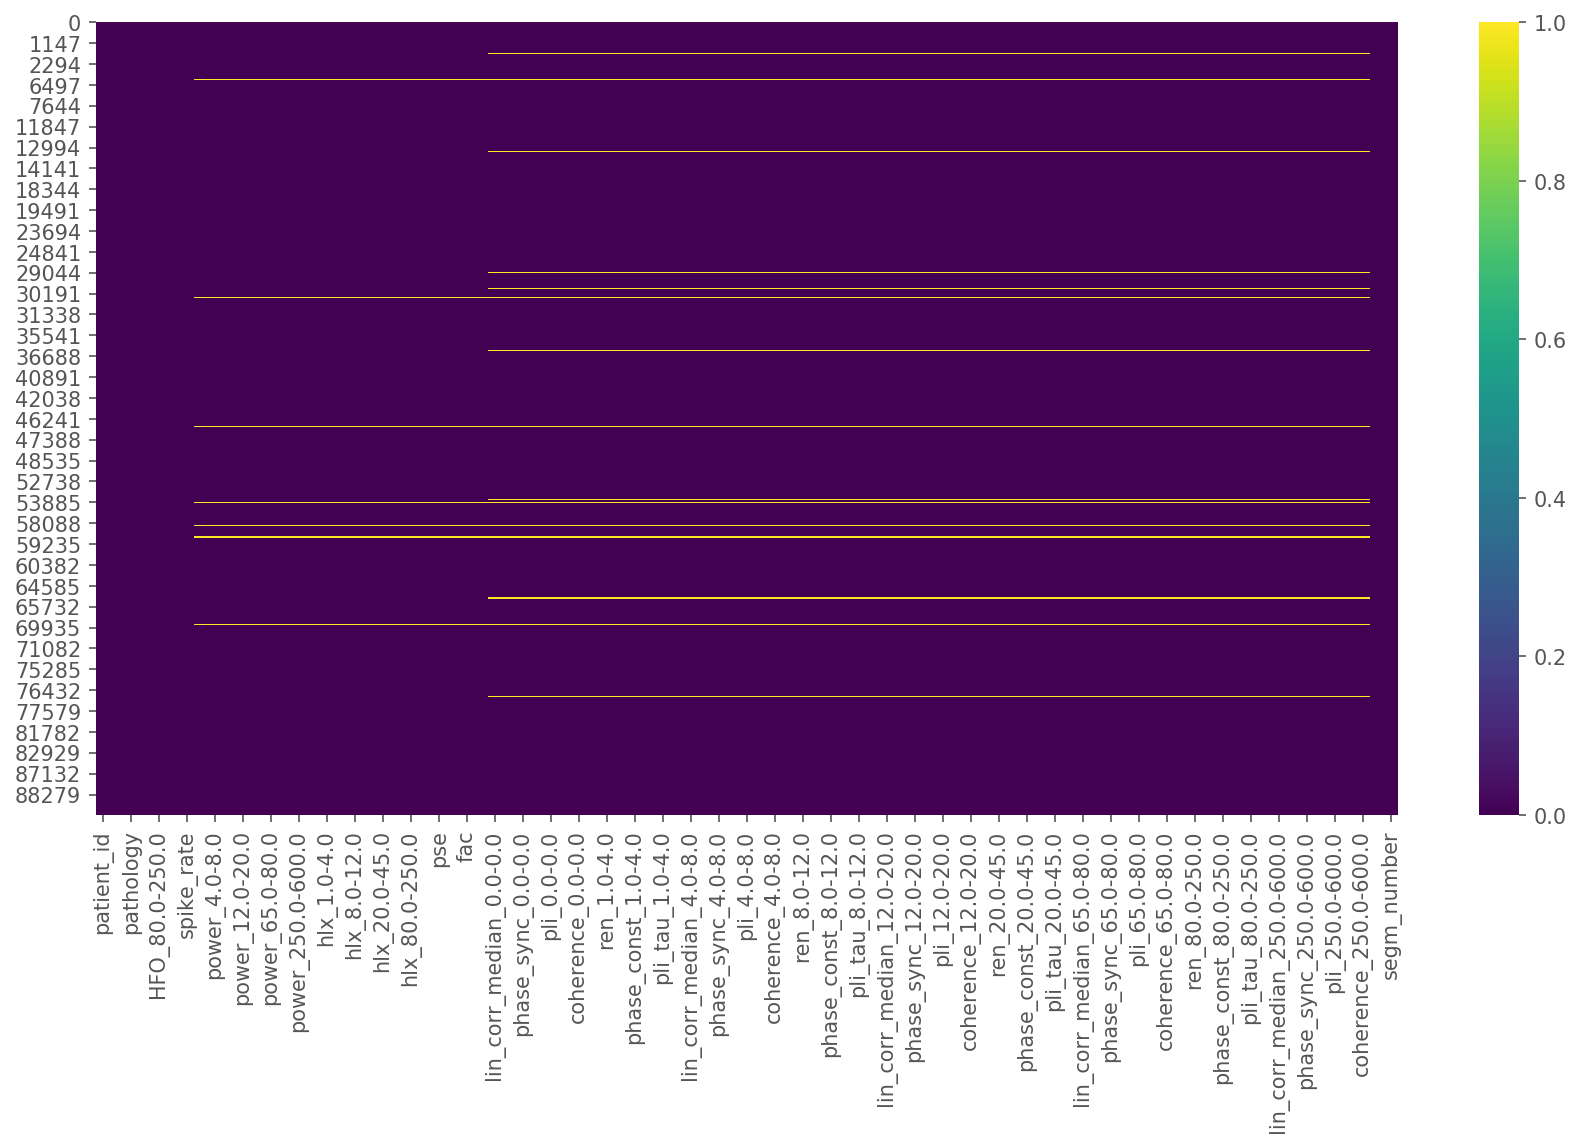

In [29]:
# Show null columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 150
sns.heatmap(df_montreal_drop.isnull(), cmap = 'viridis', cbar = True);

In [30]:
# Start H2o

import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 1 min
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,2 months and 21 days
H2O_cluster_name:,H2O_from_python_Rodina_pozpwd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.258 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


## Regression Problem
Predicting "Outcome" in Brno based on Montreal dataframe split by Brno & Montreal dataframes

In [31]:
# Parse dataframes to H2o

train = h2o.H2OFrame(df_montreal_drop)
test = h2o.H2OFrame(df_brno_drop)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
# Train dataframe summary describe

train.describe()

Rows:43568
Cols:93




,patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
type,int,enum,enum,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,int,int
mins,473.0,,,11.0,0.0,0.0,0.0,0.0033935233891528,0.0010440002162097,0.0009381938615368,0.0007864608111843,0.0006473726166243,3.366153472794717e-05,3.175480886223986e-05,7.802247174042305e-07,1.3057179148991902,1.0262446661790212,1.0259479647874832,1.0132724392414092,1.0085392993688584,1.000543340841929,1.003492754101753,1.007588633298874,1.0517670094966889,0.0717285592136559,-0.0696039786934852,-0.0550748613497449,0.0003665038410347,-0.7683093715831637,0.0027164416779851,0.0609050278140542,0.0,0.0,-218.58333333333331,0.3285223725189765,-0.8999604328970114,0.0014660500354898,0.4352255032025278,0.0,0.0,-219.0,0.7514204303423564,-0.7575910468026996,0.0002919767181625,0.4026358180555204,0.0,0.0,-111.8,0.82590652714173,-0.7077642927538059,0.0001355320757778,0.4179664339016502,0.0,0.0,-77.29333333333332,0.8271813574433327,-0.4607199422790048,8.274119297719079e-05,0.3239360477092365,0.0,0.0,-47.333333333333336,0.8091164149840673,-0.5501141544617713,4.150115938661732e-05,0.1675118703643481,0.0,0.0,-14.853333333333332,0.7750445920228958,-0.6008368995630493,1.789600557098462e-05,0.2111639325693249,0.0,0.0,-11.148333333333332,0.7887726692358653,-0.5967603107045094,8.82198939166301e-06,0.0996088667559282,0.0,0.0,-3.4,0.7185969988505045,-0.6278105069814288,1.3262518922279773e-05,0.0453562723018694,0.0,0.0,-0.7066666666666667,0.6507014270623525,0.0,0.0
mean,1053.7994858611828,,,23.24458318031585,18.507964561145805,42.02169023136248,17.498209695189125,0.6417894174338735,0.5981242023976883,0.5023476586913537,0.6457907474858363,0.5683807261392875,0.06559896709322048,0.6451430440046358,0.1407850984858387,22.91393928841235,1.3001095844017068,1.065157354434006,1.0230087119918374,1.0355102329052415,1.100617054922388,1.006752567932983,1.180845282697767,1.0771003311368466,0.4302319363300958,0.00044260956816581415,0.0005192060709798032,0.26012101136172777,0.7575360767904484,0.1728488761995865,0.7295060252475855,0.04492850769753097,0.08123957184197515,-7.023936899862822,

In [33]:
# Test dataframe summary describe

test.describe()

Rows:48896
Cols:93




,patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
type,int,enum,enum,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,real,real,int,int,int,real,int,int
mins,59.0,,,11.0,0.0,0.0,0.0,2.364873452899435e-09,5.991071834409485e-10,1.30442119819651e-10,1.1681560430904823e-10,7.101002637861296e-11,2.7499975461833418e-12,9.00901396503794e-12,1.791892948869557e-12,1.9917711675167085,1.0429315082232158,1.024207173784574,1.009632244706154,1.0169157228867214,1.0255174605051676,1.00433056751887,1.0723376913865408,1.0338828110694884,4.1345508072694234e-08,-0.0301517782869955,-0.0480698364421173,0.0001713543694596,-0.60713068140205,0.0007888324235439,0.2648637568174551,0.0,0.0,0.0,0.5318318547991414,-0.6848305695938567,0.0002853959685614,0.4160011687564353,0.0,0.0,0.0,0.8005658301711083,-0.4964481848354141,0.0002662190965012,0.3625855857071777,0.0,0.0,0.0,0.7670663423339525,-0.6718678639518718,0.0001387444527563,0.3679261469530562,0.0,0.0,0.0,0.8077897173166275,-0.5553509854665026,0.0003144570361367,0.2741534049808979,0.0,0.0,0.0,0.7843798479437828,-0.5645505384852488,0.0013636277488512,0.0709188060369342,0.0,0.0,0.0,0.3186498494446277,-0.4347636483931759,0.0004002587928456,0.1924236926358814,0.0,0.0,0.0,0.787879088918368,-0.8790900172789892,0.0004151352456028,0.0749742081714794,0.0,0.0,0.0,0.4139111252129078,-0.6287160007655621,0.0005872322634589,0.0448328197945375,0.0,0.0,0.0,0.6452274606625239,0.0,0.0
mean,77.08769633507853,,,23.271269633507845,18.388191263089002,24.219240837696326,20.639888743455515,0.03079136058001982,0.014716989436505365,0.005290321336031819,0.004439463898318842,0.0023951194501481915,5.9088984532198735e-05,0.00013520101848513855,4.010365912333661e-05,27.72975040031086,1.297278657011798,1.067601502518118,1.023450028938822,1.035897857387323,1.0978887848969043,1.0063031766503836,1.2216323616498925,1.0975930027951912,0.06488259640583932,0.0008139556732333754,0.0005924767003301349,0.13037015795479426,0.7433254770719877,0.18665768751960307,0.9251930430971375,0.0,0.0,0.0,0.9703196263365079,0.7416646929351802,0.22209255034796369,0.7942322588595484,0.0,0.0,0.0,0.9404355519229963,0.7632898524809393,0.10862501286624514,0.780

In [34]:
# Define X and y

X = train.columns
y = 'outcome'
X.remove(y)

In [35]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [36]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,
                seed=121)

%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |█
17:35:41.729: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Wall time: 10min 50s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_4_20220816_173541

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.1232010828607093
RMSE: 0.3510001180351786
MAE: 0.2506058237179481
RMSLE: 0.01942149854409232
R^2: 0.9992865064283628
Mean Residual Deviance: 0.1232010828607093
Null degrees of freedom: 9975
Residual degrees of freedom: 9972
Null deviance: 1722777.69062187
Residual deviance: 1229.054002618436
AIC: 7431.541728347496

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.5878365804137072
RMSE: 0.7667050152527419
MAE: 0.489156785222193
RMSLE: 0.0408300147762104
R^2: 0.9965641899138046
Mean Residual Deviance: 0.5878365804137072
Null degrees

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,4.891660e-01,0.005811,4.938866e-01,4.920177e-01,4.847376e-01,4.812661e-01,4.939221e-01
1,mean_residual_deviance,5.878965e-01,0.023165,5.874350e-01,6.142260e-01,5.714488e-01,5.593315e-01,6.070409e-01
2,mse,5.878965e-01,0.023165,5.874350e-01,6.142260e-01,5.714488e-01,5.593315e-01,6.070409e-01
3,null_deviance,1.490855e+06,8551.956000,1.499730e+06,1.481500e+06,1.499888e+06,1.484568e+06,1.488588e+06
4,r2,9.965639e-01,0.000131,9.965793e-01,9.964048e-01,9.966398e-01,9.967310e-01,9.964644e-01
5,residual_deviance,5.122173e+03,187.702600,5.130070e+03,5.325954e+03,5.039036e+03,4.852760e+03,5.263045e+03
6,rmse,7.666248e-01,0.015117,7.664431e-01,7.837257e-01,7.559423e-01,7.478847e-01,7.791283e-01
7,rmsle,4.081915e-02,0.001332,4.009110e-02,4.234723e-02,3.920283e-02,4.042468e-02,4.202994e-02


In [38]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_4_20220816_173541,0.766705,0.587837,0.489157,0.04083,0.587837
StackedEnsemble_AllModels_1_AutoML_4_20220816_173541,0.766749,0.587904,0.489184,0.0408328,0.587904
StackedEnsemble_BestOfFamily_2_AutoML_4_20220816_173541,0.874819,0.765307,0.560162,0.0471896,0.765307
StackedEnsemble_BestOfFamily_3_AutoML_4_20220816_173541,0.874908,0.765465,0.56019,0.0471918,0.765465
StackedEnsemble_BestOfFamily_1_AutoML_4_20220816_173541,0.886915,0.786618,0.566893,0.0481087,0.786618
GBM_1_AutoML_4_20220816_173541,0.890424,0.792854,0.564029,0.0481024,0.792854
GBM_4_AutoML_4_20220816_173541,1.03421,1.06959,0.604394,0.0520899,1.06959
GBM_3_AutoML_4_20220816_173541,1.24491,1.54979,0.813213,0.0647807,1.54979
GBM_2_AutoML_4_20220816_173541,1.37948,1.90298,0.907058,0.0718671,1.90298
DRF_1_AutoML_4_20220816_173541,1.95993,3.84134,1.11475,0.0956818,3.84134


In [39]:
# Explain a single H2O model (e.g. leader model from AutoML)

# exm = aml.leader.explain(test)

In [51]:
# Leader Stacked Ensemble (SE) model 

model = h2o.get_model('StackedEnsemble_AllModels_2_AutoML_4_20220816_173541')

In [52]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.12143094235548724
RMSE: 0.34846942815042936
MAE: 0.24819799298682868
RMSLE: 0.019755452014648664
R^2: 0.9992831146147391
Mean Residual Deviance: 0.12143094235548724
Null degrees of freedom: 10846
Residual degrees of freedom: 10843
Null deviance: 1837339.2801476617
Residual deviance: 1317.16143172997
AIC: 7922.534112926613


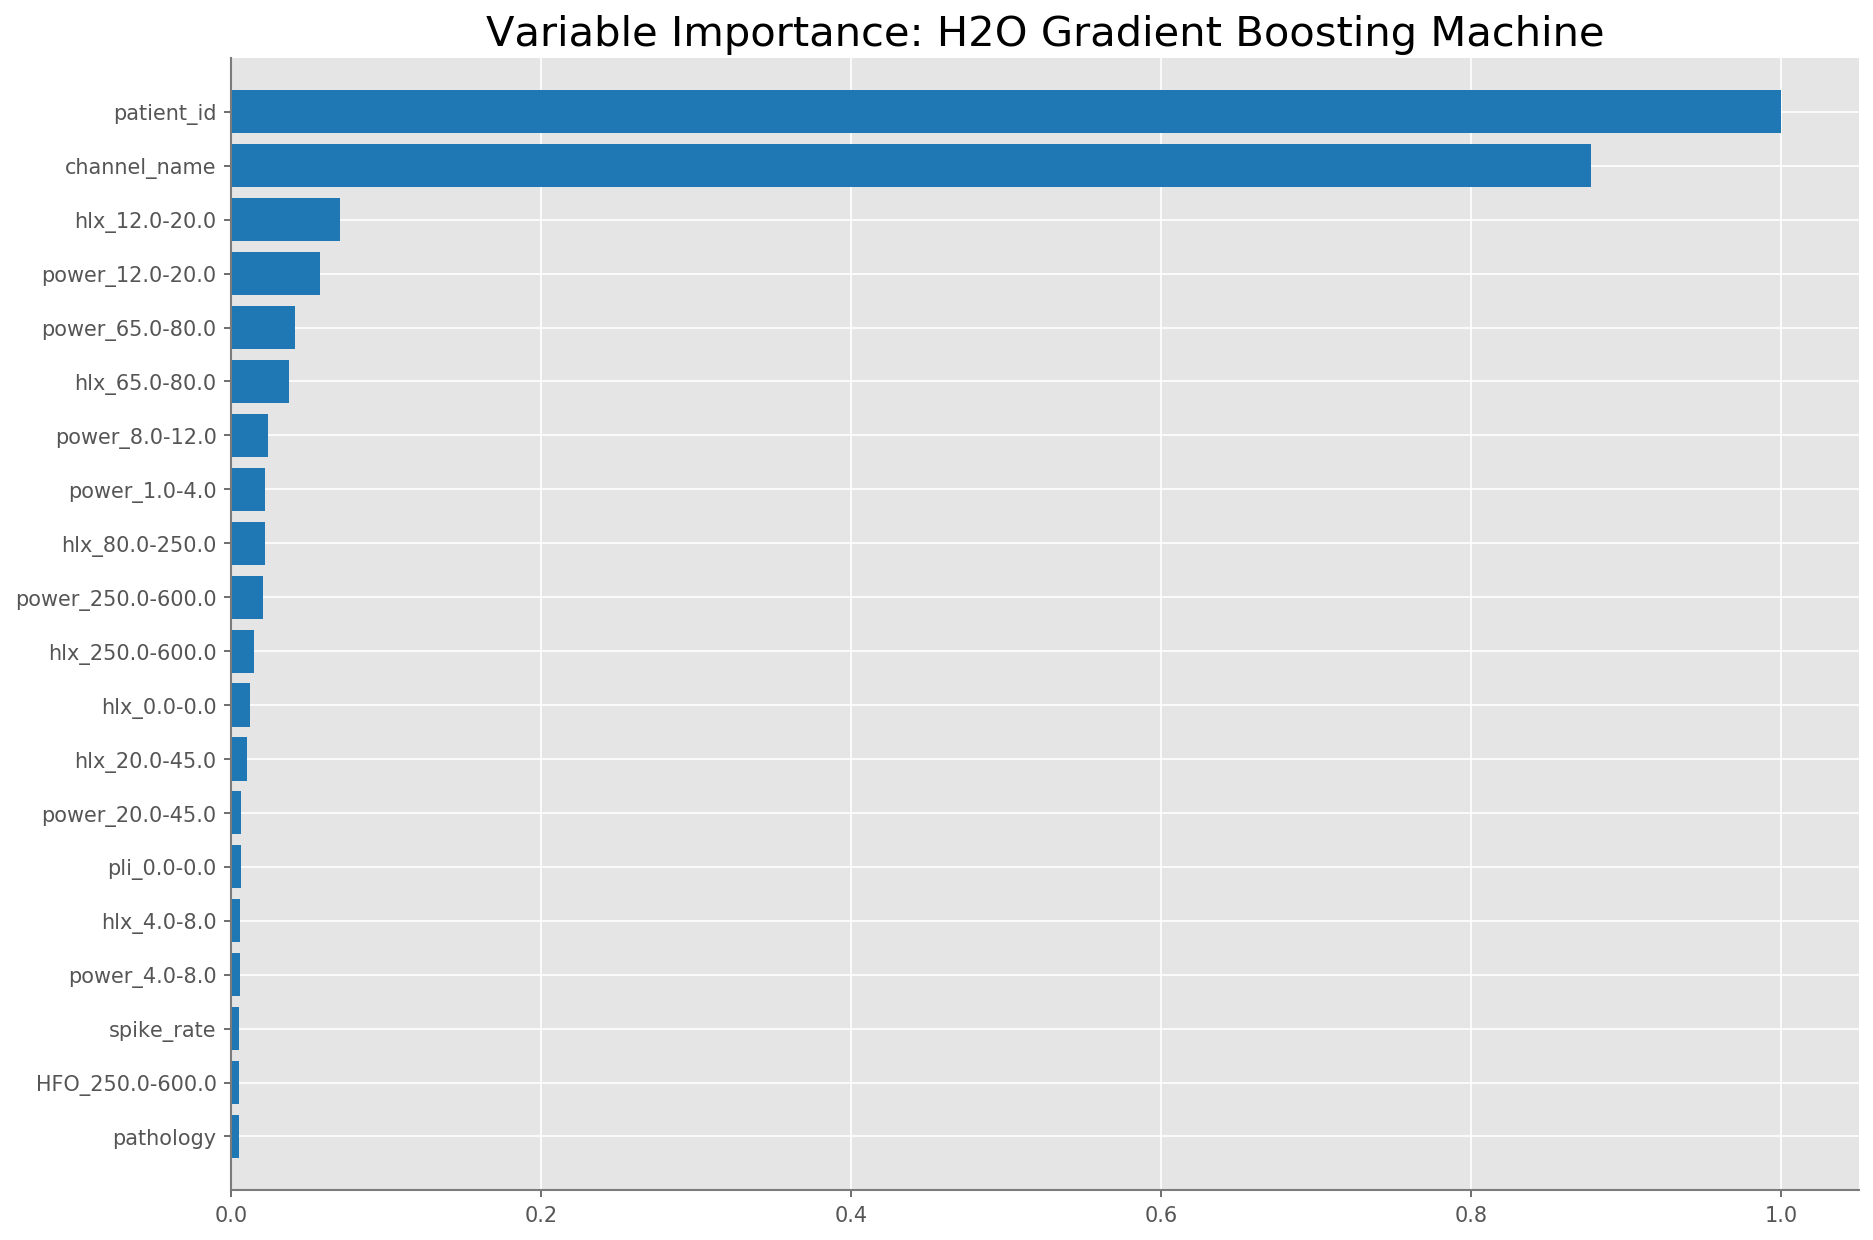

<Figure size 2100x1050 with 0 Axes>

In [42]:
# Show variable importance

model.varimp_plot(num_of_features=20)

In [57]:
# Learning curve plot 

# learning_curve_plot = model.learning_curve_plot()

In [54]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [55]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,predict
583,ra2,normal,11,16,40,49,0.518898,0.780688,1.059,0.246359,0.417731,0.0172302,0.0471388,0.0136991,22.8359,1.12322,1.05522,1.01696,1.03695,1.06297,1.00613,1.19346,1.06995,0.458209,-0.000984755,-0.00905946,0.168028,0.895323,0.0916576,0.836928,0.666348,0.986216,-99.3333,0.946648,0.942342,0.0795242,0.937776,0.815142,0.998376,-186.042,0.979502,0.974472,0.0350385,0.954852,0.837306,0.99803,-98.88,0.989349,0.996158,0.00660758,0.990449,0.940477,0.999811,-71.76,0.998444,0.991969,0.00839352,0.978559,0.892505,0.995642,-36.325,0.996168,0.996082,0.00432014,0.988694,0.915274,0.992457,-8.10333,0.998027,0.995883,0.00233462,0.988538,0.925232,0.999162,-9.625,0.997981,0.997392,0.00183677,0.990797,0.904985,0.931978,-0.286667,0.998458,0.993981,0.00284724,0.979349,1,0.841924,-0.113333,0.996071,0,0,11.4882
583,ra6,normal,11,7,49,25,0.472965,0.964676,0.716276,0.190351,0.285159,0.0119757,0.0306428,0.00867748,15.9948,1.12082,1.04599,1.01865,1.03682,1.06514,1.00607,1.19647,1.06968,0.489201,-0.00124926,-0.00812918,0.311882,0.80543,0.15446,0.738541,0.533939,0.984647,-107.542,0.925594,0.950784,0.0875988,0.949821,0.810448,0.998278,-202.5,0.98183,0.954714,0.0519073,0.931563,0.780118,0.999004,-104.74,0.983585,0.990476,0.0136245,0.980753,0.896656,0.999773,-71.48,0.996043,0.979759,0.0162106,0.953787,0.806158,0.995225,-34.7917,0.990522,0.993031,0.00514991,0.979625,0.857497,0.993686,-7.50333,0.996582,0.990899,0.0046373,0.975816,0.870893,0.995709,-9.31667,0.995484,0.994831,0.00303515,0.982651,0.849122,0.914038,-0.568333,0.996949,0.996837,0.00170874,0.987526,1,0.861303,-0.0366667,0.997865,0,0,10.8707
583,rca10,normal,11,6,19,8,0.347042,1.11594,1.01504,0.31053,0.481209,0.0210714,0.0541044,0.0149408,9.20048,1.2172,1.04755,1.01692,1.03646,1.06127,1.00601,1.19697,1.06963,0.566548,0.000565154,-0.0015228,0.884501,0.606213,0.25021,0.519823,0.359725,0.969987,-84.5833,0.814854,0.877887,0.151694,0.858039,0.639372,0.99688,-188.833,0.945312,0.910682,0.0819024,0.872303,0.671488,0.99627,-92.92,0.968876,0.966288,0.0354714,0.943581,0.791414,0.999378,-69.3733,0.986529,0.91726,0.0433487,0.862112,0.651536,0.996284,-30.2333,0.964943,0.931246,0.0329878,0.873649,0.631333,0.963023,-8.09333,0.968114,0.928506,0.0205303,0.87357,0.714121,0.983354,-6.8,0.967883,0.96887,0.015679,0.924473,0.657152,0.846088,-0.553333,0.982275,0.990122,0.00480543,0.96761,1,0.80995,0.1,0.993455,0,0,10.9709
583,rca2,normal,11,4,21,13,0.439451,2.11374,2.96101,0.694114,1.13117,0.065

In [56]:
# Create dataframe for first 100 predictions

df = h2o.as_list(df)

preds = df[['outcome', 'predict']].head(100)
preds

,outcome,predict
0,11,11.488232
1,11,10.870698
2,11,10.970893
3,11,11.823927
4,11,11.505400
...,...,...
95,42,42.191645
96,42,42.211910
97,42,41.956614
98,42,42.309318


In [47]:
# Save the results

#df.to_csv('df.csv')
#preds.to_csv('preds.csv')

## REGRESSION PROBLEM
Predicting "Outcome" in Montreal dataframe split by .75 ratio

In [58]:
# Parse dataframe df_montreal_drop to H2o

h2o_df_montreal = h2o.H2OFrame(df_montreal_drop)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [59]:
# Monteal dataframe summary describe

h2o_df_montreal.describe()

Rows:43568
Cols:93




,patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
type,int,enum,enum,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,int,int
mins,473.0,,,11.0,0.0,0.0,0.0,0.0033935233891528,0.0010440002162097,0.0009381938615368,0.0007864608111843,0.0006473726166243,3.366153472794717e-05,3.175480886223986e-05,7.802247174042305e-07,1.3057179148991902,1.0262446661790212,1.0259479647874832,1.0132724392414092,1.0085392993688584,1.000543340841929,1.003492754101753,1.007588633298874,1.0517670094966889,0.0717285592136559,-0.0696039786934852,-0.0550748613497449,0.0003665038410347,-0.7683093715831637,0.0027164416779851,0.0609050278140542,0.0,0.0,-218.58333333333331,0.3285223725189765,-0.8999604328970114,0.0014660500354898,0.4352255032025278,0.0,0.0,-219.0,0.7514204303423564,-0.7575910468026996,0.0002919767181625,0.4026358180555204,0.0,0.0,-111.8,0.82590652714173,-0.7077642927538059,0.0001355320757778,0.4179664339016502,0.0,0.0,-77.29333333333332,0.8271813574433327,-0.4607199422790048,8.274119297719079e-05,0.3239360477092365,0.0,0.0,-47.333333333333336,0.8091164149840673,-0.5501141544617713,4.150115938661732e-05,0.1675118703643481,0.0,0.0,-14.853333333333332,0.7750445920228958,-0.6008368995630493,1.789600557098462e-05,0.2111639325693249,0.0,0.0,-11.148333333333332,0.7887726692358653,-0.5967603107045094,8.82198939166301e-06,0.0996088667559282,0.0,0.0,-3.4,0.7185969988505045,-0.6278105069814288,1.3262518922279773e-05,0.0453562723018694,0.0,0.0,-0.7066666666666667,0.6507014270623525,0.0,0.0
mean,1053.7994858611828,,,23.24458318031585,18.507964561145805,42.02169023136248,17.498209695189125,0.6417894174338735,0.5981242023976883,0.5023476586913537,0.6457907474858363,0.5683807261392875,0.06559896709322048,0.6451430440046358,0.1407850984858387,22.91393928841235,1.3001095844017068,1.065157354434006,1.0230087119918374,1.0355102329052415,1.100617054922388,1.006752567932983,1.180845282697767,1.0771003311368466,0.4302319363300958,0.00044260956816581415,0.0005192060709798032,0.26012101136172777,0.7575360767904484,0.1728488761995865,0.7295060252475855,0.04492850769753097,0.08123957184197515,-7.023936899862822,

In [60]:
# Split train and test sets

train, test = h2o_df_montreal.split_frame(ratios=[.75], seed=121)

# Define X and y

X = train.columns
y = 'outcome'
X.remove(y)

In [61]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [62]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,
                seed=121)

%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |█
17:50:59.144: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Wall time: 10min 53s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_5_20220816_175059

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.13852139540676056
RMSE: 0.37218462543039116
MAE: 0.2867802988674134
RMSLE: 0.0206156516081748
R^2: 0.9991971877233524
Mean Residual Deviance: 0.13852139540676056
Null degrees of freedom: 10077
Residual degrees of freedom: 10074
Null deviance: 1738983.8151960573
Residual deviance: 1396.0186229093329
AIC: 8688.635239237137

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.8750115775609454
RMSE: 0.935420535139648
MAE: 0.5576391027689555
RMSLE: 0.04667360201629227
R^2: 0.9949025305774748
Mean Residual Deviance: 0.8750115775609454
Null

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,5.576626e-01,0.007331,5.549473e-01,5.686445e-01,5.573226e-01,5.589652e-01,5.484335e-01
1,mean_residual_deviance,8.754348e-01,0.071498,8.496079e-01,1.001180e+00,8.304646e-01,8.627377e-01,8.331838e-01
2,mse,8.754348e-01,0.071498,8.496079e-01,1.001180e+00,8.304646e-01,8.627377e-01,8.331838e-01
3,null_deviance,1.123429e+06,18604.410000,1.125393e+06,1.095547e+06,1.147970e+06,1.124007e+06,1.124231e+06
4,r2,9.948965e-01,0.000458,9.950554e-01,9.940875e-01,9.951790e-01,9.949992e-01,9.951617e-01
5,residual_deviance,5.726251e+03,424.474000,5.563232e+03,6.476634e+03,5.534216e+03,5.618148e+03,5.439024e+03
6,rmse,9.350511e-01,0.037319,9.217417e-01,1.000590e+00,9.112983e-01,9.288367e-01,9.127890e-01
7,rmsle,4.666506e-02,0.001409,4.784291e-02,4.738744e-02,4.487859e-02,4.779768e-02,4.541870e-02


In [63]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_5_20220816_175059,0.935421,0.875012,0.557639,0.0466736,0.875012
StackedEnsemble_AllModels_2_AutoML_5_20220816_175059,0.935431,0.875031,0.55763,0.046673,0.875031
StackedEnsemble_AllModels_1_AutoML_5_20220816_175059,0.935554,0.875261,0.557684,0.0466718,0.875261
StackedEnsemble_BestOfFamily_3_AutoML_5_20220816_175059,1.07106,1.14717,0.620601,0.0524001,1.14717
StackedEnsemble_BestOfFamily_2_AutoML_5_20220816_175059,1.07118,1.14742,0.619879,0.0523945,1.14742
GBM_4_AutoML_5_20220816_175059,1.09615,1.20154,0.601215,0.0531518,1.20154
StackedEnsemble_BestOfFamily_1_AutoML_5_20220816_175059,1.14006,1.29974,0.736648,0.0609443,1.29974
GBM_1_AutoML_5_20220816_175059,1.14702,1.31564,0.731098,0.0608622,1.31564
GBM_3_AutoML_5_20220816_175059,1.2688,1.60984,0.79389,0.063929,1.60984
GBM_2_AutoML_5_20220816_175059,1.38677,1.92314,0.888541,0.0708929,1.92314


In [64]:
# Explain a single H2O model (e.g. leader model from AutoML)

# exm = aml.leader.explain(test)

In [68]:
# Leader Stacked Ensemble (SE) model 

model = h2o.get_model('StackedEnsemble_AllModels_3_AutoML_5_20220816_175059')

In [69]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.650350926435078
RMSE: 0.8064433807993454
MAE: 0.4935316950953379
RMSLE: 0.04180544429871845
R^2: 0.9961605578824603
Mean Residual Deviance: 0.650350926435078
Null degrees of freedom: 10846
Residual degrees of freedom: 10843
Null deviance: 1837339.5453377876
Residual deviance: 7054.356499041291
AIC: 26125.60482059753


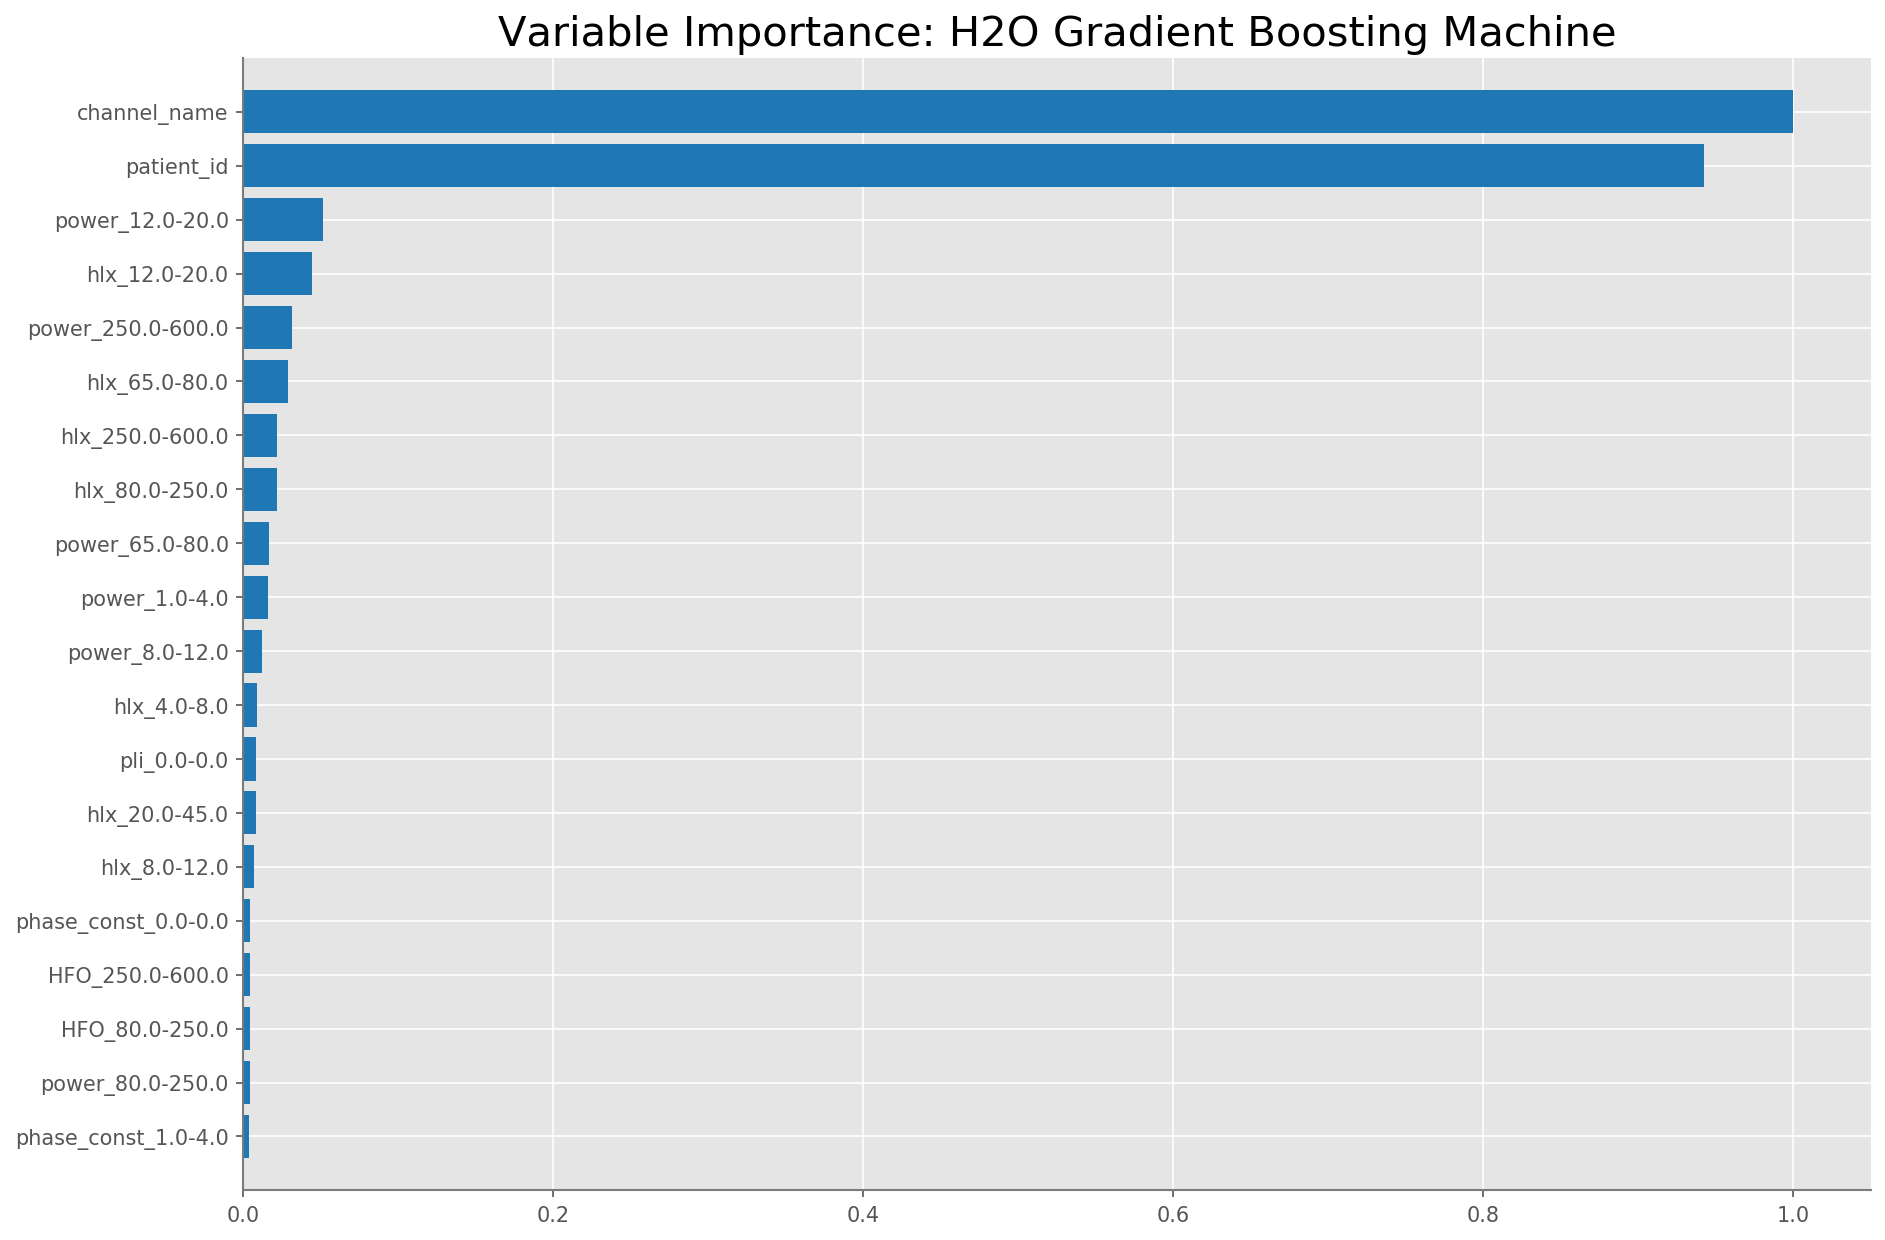

<Figure size 2100x1050 with 0 Axes>

In [67]:
# Show variable importance

model.varimp_plot(num_of_features=20)

In [71]:
# Learning curve plot 

# learning_curve_plot = model.learning_curve_plot()

In [72]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [73]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,predict
583,ra2,normal,11,16,40,49,0.518898,0.780688,1.059,0.246359,0.417731,0.0172302,0.0471388,0.0136991,22.8359,1.12322,1.05522,1.01696,1.03695,1.06297,1.00613,1.19346,1.06995,0.458209,-0.000984755,-0.00905946,0.168028,0.895323,0.0916576,0.836928,0.666348,0.986216,-99.3333,0.946648,0.942342,0.0795242,0.937776,0.815142,0.998376,-186.042,0.979502,0.974472,0.0350385,0.954852,0.837306,0.99803,-98.88,0.989349,0.996158,0.00660758,0.990449,0.940477,0.999811,-71.76,0.998444,0.991969,0.00839352,0.978559,0.892505,0.995642,-36.325,0.996168,0.996082,0.00432014,0.988694,0.915274,0.992457,-8.10333,0.998027,0.995883,0.00233462,0.988538,0.925232,0.999162,-9.625,0.997981,0.997392,0.00183677,0.990797,0.904985,0.931978,-0.286667,0.998458,0.993981,0.00284724,0.979349,1,0.841924,-0.113333,0.996071,0,0,11.6979
583,ra6,normal,11,7,49,25,0.472965,0.964676,0.716276,0.190351,0.285159,0.0119757,0.0306428,0.00867748,15.9948,1.12082,1.04599,1.01865,1.03682,1.06514,1.00607,1.19647,1.06968,0.489201,-0.00124926,-0.00812918,0.311882,0.80543,0.15446,0.738541,0.533939,0.984647,-107.542,0.925594,0.950784,0.0875988,0.949821,0.810448,0.998278,-202.5,0.98183,0.954714,0.0519073,0.931563,0.780118,0.999004,-104.74,0.983585,0.990476,0.0136245,0.980753,0.896656,0.999773,-71.48,0.996043,0.979759,0.0162106,0.953787,0.806158,0.995225,-34.7917,0.990522,0.993031,0.00514991,0.979625,0.857497,0.993686,-7.50333,0.996582,0.990899,0.0046373,0.975816,0.870893,0.995709,-9.31667,0.995484,0.994831,0.00303515,0.982651,0.849122,0.914038,-0.568333,0.996949,0.996837,0.00170874,0.987526,1,0.861303,-0.0366667,0.997865,0,0,11.8225
583,rca10,normal,11,6,19,8,0.347042,1.11594,1.01504,0.31053,0.481209,0.0210714,0.0541044,0.0149408,9.20048,1.2172,1.04755,1.01692,1.03646,1.06127,1.00601,1.19697,1.06963,0.566548,0.000565154,-0.0015228,0.884501,0.606213,0.25021,0.519823,0.359725,0.969987,-84.5833,0.814854,0.877887,0.151694,0.858039,0.639372,0.99688,-188.833,0.945312,0.910682,0.0819024,0.872303,0.671488,0.99627,-92.92,0.968876,0.966288,0.0354714,0.943581,0.791414,0.999378,-69.3733,0.986529,0.91726,0.0433487,0.862112,0.651536,0.996284,-30.2333,0.964943,0.931246,0.0329878,0.873649,0.631333,0.963023,-8.09333,0.968114,0.928506,0.0205303,0.87357,0.714121,0.983354,-6.8,0.967883,0.96887,0.015679,0.924473,0.657152,0.846088,-0.553333,0.982275,0.990122,0.00480543,0.96761,1,0.80995,0.1,0.993455,0,0,10.9577
583,rca2,normal,11,4,21,13,0.439451,2.11374,2.96101,0.694114,1.13117,0.065

In [74]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['outcome', 'predict']].head(20)
preds

,outcome,predict
0,11,11.697944
1,11,11.822484
2,11,10.957705
3,11,12.471660
4,11,13.035949
5,11,13.607324
6,11,10.477468
7,11,10.274125
8,11,13.567943
9,11,12.827008


## CLASSIFICATION PROBLEM
Predicting "Pathology" in Montreal dataframe split by .75 ratio

In [82]:
# Drop columns no. 2, 3 and 5, 6

df_montreal_drop_new = df_montreal.drop(df_montreal.columns[[2, 3, 5, 6]], axis=1)

In [76]:
# Parse dataframe df_epilepsy to H2o

h2o_df_new = h2o.H2OFrame(df_montreal_drop_new)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [77]:
# Dataframe summary describe

h2o_df_new.describe()

Rows:43568
Cols:92




,patient_id,channel_name,pathology,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
type,int,enum,enum,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,int,int
mins,473.0,,,0.0,0.0,0.0,0.0033935233891528,0.0010440002162097,0.0009381938615368,0.0007864608111843,0.0006473726166243,3.366153472794717e-05,3.175480886223986e-05,7.802247174042305e-07,1.3057179148991902,1.0262446661790212,1.0259479647874832,1.0132724392414092,1.0085392993688584,1.000543340841929,1.003492754101753,1.007588633298874,1.0517670094966889,0.0717285592136559,-0.0696039786934852,-0.0550748613497449,0.0003665038410347,-0.7683093715831637,0.0027164416779851,0.0609050278140542,0.0,0.0,-218.58333333333331,0.3285223725189765,-0.8999604328970114,0.0014660500354898,0.4352255032025278,0.0,0.0,-219.0,0.7514204303423564,-0.7575910468026996,0.0002919767181625,0.4026358180555204,0.0,0.0,-111.8,0.82590652714173,-0.7077642927538059,0.0001355320757778,0.4179664339016502,0.0,0.0,-77.29333333333332,0.8271813574433327,-0.4607199422790048,8.274119297719079e-05,0.3239360477092365,0.0,0.0,-47.333333333333336,0.8091164149840673,-0.5501141544617713,4.150115938661732e-05,0.1675118703643481,0.0,0.0,-14.853333333333332,0.7750445920228958,-0.6008368995630493,1.789600557098462e-05,0.2111639325693249,0.0,0.0,-11.148333333333332,0.7887726692358653,-0.5967603107045094,8.82198939166301e-06,0.0996088667559282,0.0,0.0,-3.4,0.7185969988505045,-0.6278105069814288,1.3262518922279773e-05,0.0453562723018694,0.0,0.0,-0.7066666666666667,0.6507014270623525,0.0,0.0
mean,1053.7994858611828,,,18.507964561145798,42.02169023136249,17.49820969518912,0.641789417433874,0.5981242023976882,0.5023476586913536,0.6457907474858368,0.5683807261392875,0.06559896709322056,0.6451430440046343,0.14078509848583878,22.913939288412386,1.3001095844017048,1.065157354434006,1.023008711991839,1.0355102329052421,1.1006170549223893,1.0067525679329823,1.1808452826977673,1.0771003311368457,0.4302319363300958,0.0004426095681658138,0.0005192060709798032,0.26012101136172794,0.7575360767904481,0.17284887619958655,0.7295060252475855,0.04492850769753099,0.08123957184197511,-7.023936899862825,0.9091459071257265,0.885361327418

In [78]:
# Split train and test sets

train, test = h2o_df_new.split_frame(ratios=[.75], seed=121)

# Define X and y

X = train.columns
y = 'pathology'
X.remove(y)

In [79]:
# For binary classification, response should be a factor

train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
y

'pathology'

In [80]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [81]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |█
18:04:59.482: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Wall time: 10min 59s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_6_20220816_180459

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0012136441043324397
RMSE: 0.03483739520016443
LogLoss: 0.006546684816797176
Null degrees of freedom: 10077
Residual degrees of freedom: 10072
Null deviance: 9308.127513532849
Residual deviance: 131.95497916736386
AIC: 143.95497916736386
AUC: 0.9999960221052981
AUCPR: 0.9999811532191933
Gini: 0.9999920442105963

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8293177934820049: 


,,normal,pathologic,Error,Rate
0,normal,8326.0,1.0,0.0001,(1.0/8327.0)
1,pathologic,3.0,1748.0,0.0017,(3.0/1751.0)
2,Total,8329.0,1749.0,0.0004,(4.0/10078.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.829318,0.998857,152.0
1,max f2,0.709208,0.998744,155.0
2,max f0point5,0.829318,0.999200,152.0
3,max accuracy,0.829318,0.999603,152.0
4,max precision,0.999984,1.000000,0.0
5,max recall,0.360029,1.000000,176.0
6,max specificity,0.999984,1.000000,0.0
7,max absolute_mcc,0.829318,0.998617,152.0
8,max min_per_class_accuracy,0.709208,0.998858,155.0
9,max mean_per_class_accuracy,0.709208,0.999249,155.0



Gains/Lift Table: Avg response rate: 17.37 %, avg score: 17.65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,9.999888e-01,5.755568,5.755568,1.000000,9.999918e-01,1.000000,0.999992,0.057681,0.057681,475.556825,475.556825,0.057681
1,2,0.020044,9.998645e-01,5.755568,5.755568,1.000000,9.999384e-01,1.000000,0.999965,0.057681,0.115363,475.556825,475.556825,0.115363
2,3,0.030065,9.996764e-01,5.755568,5.755568,1.000000,9.997598e-01,1.000000,0.999897,0.057681,0.173044,475.556825,475.556825,0.173044
3,4,0.040087,9.994405e-01,5.755568,5.755568,1.000000,9.995554e-01,1.000000,0.999811,0.057681,0.230725,475.556825,475.556825,0.230725
4,5,0.050010,9.992289e-01,5.755568,5.755568,1.000000,9.993472e-01,1.000000,0.999719,0.057110,0.287836,475.556825,475.556825,0.287836
5,6,0.100020,9.970329e-01,5.755568,5.755568,1.000000,9.982873e-01,1.000000,0.999003,0.287836,0.575671,475.556825,475.556825,0.575671
6,7,0.150030,9.876613e-01,5.755568,5.755568,1.000000,9.936633e-01,1.000000,0.997223,0.287836,0.863507,475.556825,475.556825,0.863507
7,8,0.200040,2.621623e-02,2.729327,4.999008,0.474206,5.271862e-01,0.868552,0.879714,0.136493,1.000000,172.932701,399.900794,0.968176
8,9,0.300060,4.048435e-04,0.000000,3.332672,0.000000,4.718956e-03,0.579034,0.588049,0.000000,1.000000,-100.000000,233.267196,0.847124
9,10,0.399980,4.460833e-05,0.000000,2.500124,0.000000,1.510560e-04,0.434384,0.441184,0.000000,1.000000,-100.000000,150.012404,0.726192




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.008832847288997539
RMSE: 0.0939832287644851
LogLoss: 0.03264860791146872
Null degrees of freedom: 32720
Residual degrees of freedom: 32715
Null deviance: 30518.093855897547
Residual deviance: 2136.5901989423364
AIC: 2148.5901989423364
AUC: 0.9988673889724254
AUCPR: 0.9954684698391845
Gini: 0.9977347779448509

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5847486692095941: 


,,normal,pathologic,Error,Rate
0,normal,26814.0,126.0,0.0047,(126.0/26940.0)
1,pathologic,234.0,5547.0,0.0405,(234.0/5781.0)
2,Total,27048.0,5673.0,0.011,(360.0/32721.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.584749,0.968570,179.0
1,max f2,0.402604,0.971667,225.0
2,max f0point5,0.757418,0.979856,133.0
3,max accuracy,0.584749,0.988998,179.0
4,max precision,0.999932,1.000000,0.0
5,max recall,0.000927,1.000000,394.0
6,max specificity,0.999932,1.000000,0.0
7,max absolute_mcc,0.584749,0.961965,179.0
8,max min_per_class_accuracy,0.249107,0.982702,269.0
9,max mean_per_class_accuracy,0.336666,0.983089,243.0



Gains/Lift Table: Avg response rate: 17.67 %, avg score: 17.67 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010024,9.997066e-01,5.660093,5.660093,1.000000,9.999114e-01,1.000000,0.999911,0.056738,0.056738,466.009341,466.009341,0.056738
1,2,0.020018,9.994211e-01,5.660093,5.660093,1.000000,9.995549e-01,1.000000,0.999733,0.056565,0.113302,466.009341,466.009341,0.113302
2,3,0.030011,9.990398e-01,5.660093,5.660093,1.000000,9.992394e-01,1.000000,0.999569,0.056565,0.169867,466.009341,466.009341,0.169867
3,4,0.040005,9.985679e-01,5.660093,5.660093,1.000000,9.988057e-01,1.000000,0.999378,0.056565,0.226431,466.009341,466.009341,0.226431
4,5,0.050029,9.979815e-01,5.660093,5.660093,1.000000,9.982786e-01,1.000000,0.999158,0.056738,0.283169,466.009341,466.009341,0.283169
5,6,0.100028,9.893048e-01,5.660093,5.660093,1.000000,9.948402e-01,1.000000,0.997000,0.282996,0.566165,466.009341,466.009341,0.566165
6,7,0.150026,9.215079e-01,5.646255,5.655481,0.997555,9.685927e-01,0.999185,0.987533,0.282304,0.848469,464.625455,465.548140,0.848321
7,8,0.200024,1.065500e-01,2.819668,4.946636,0.498166,5.308113e-01,0.873950,0.873370,0.140979,0.989448,181.966756,394.663626,0.958825
8,9,0.300021,1.367530e-03,0.103791,3.332519,0.018337,1.902722e-02,0.588775,0.588618,0.010379,0.999827,-89.620856,233.251909,0.849975
9,10,0.400018,1.444300e-04,0.001730,2.499885,0.000306,5.093742e-04,0.441669,0.441602,0.000173,1.000000,-99.827014,149.988540,0.728731




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.989433,0.001732,0.991448,0.989025,0.987095,0.988790,0.990809
1,auc,0.998864,0.000317,0.999219,0.998634,0.998460,0.998900,0.999108
2,err,0.010567,0.001732,0.008552,0.010975,0.012905,0.011210,0.009191
3,err_count,69.200000,11.819475,56.000000,71.000000,86.000000,73.000000,60.000000
4,f0point5,0.973098,0.006712,0.980292,0.970891,0.962820,0.974336,0.977151
5,f1,0.969845,0.005526,0.976311,0.968570,0.962314,0.967912,0.974116
6,f2,0.966620,0.005045,0.972363,0.966260,0.961808,0.961572,0.971099
7,lift_top_group,5.661705,0.123224,5.502521,5.704586,5.835377,5.662609,5.603434
8,logloss,0.032636,0.003491,0.028556,0.034657,0.037175,0.032870,0.029923
9,max_per_class_error,0.035513,0.005207,0.030252,0.035273,0.038529,0.042609,0.030901



See the whole table with table.as_data_frame()


In [83]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_6_20220816_180459,0.998867,0.0326486,0.995468,0.0225772,0.0939832,0.00883285
StackedEnsemble_AllModels_2_AutoML_6_20220816_180459,0.998865,0.0326717,0.995453,0.0225279,0.0940437,0.00884422
StackedEnsemble_AllModels_1_AutoML_6_20220816_180459,0.998826,0.0323236,0.995342,0.0209837,0.0932537,0.00869626
StackedEnsemble_BestOfFamily_3_AutoML_6_20220816_180459,0.998676,0.0353515,0.994594,0.0221147,0.0978204,0.00956883
StackedEnsemble_BestOfFamily_2_AutoML_6_20220816_180459,0.998604,0.0354928,0.994352,0.021837,0.0981266,0.00962883
GBM_4_AutoML_6_20220816_180459,0.998524,0.0907003,0.994032,0.0225167,0.152245,0.0231785
GBM_1_AutoML_6_20220816_180459,0.998409,0.0925684,0.993748,0.0266367,0.155027,0.0240335
StackedEnsemble_BestOfFamily_1_AutoML_6_20220816_180459,0.998399,0.0374873,0.993725,0.0263156,0.101386,0.010279
GBM_3_AutoML_6_20220816_180459,0.997621,0.0926203,0.989712,0.0276797,0.157601,0.0248381
GBM_2_AutoML_6_20220816_180459,0.99695,0.0952638,0.986931,0.0351862,0.160534,0.0257712


In [84]:
# Explain a single H2O model (e.g. leader model from AutoML)

# exm = aml.leader.explain(test)

In [88]:
# Leader Stacked Ensemble (SE) model 

model = h2o.get_model('StackedEnsemble_AllModels_3_AutoML_6_20220816_180459')

In [89]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.005944198727080917
RMSE: 0.0770986298651339
LogLoss: 0.023454604708806243
Null degrees of freedom: 10846
Residual degrees of freedom: 10841
Null deviance: 10062.676759674636
Residual deviance: 508.8241945528425
AIC: 520.8241945528425
AUC: 0.9994192941583022
AUCPR: 0.997524170491772
Gini: 0.9988385883166044

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5044102612671437: 


,,normal,pathologic,Error,Rate
0,normal,8919.0,29.0,0.0032,(29.0/8948.0)
1,pathologic,38.0,1861.0,0.02,(38.0/1899.0)
2,Total,8957.0,1890.0,0.0062,(67.0/10847.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.504410,0.982317,200.0
1,max f2,0.359233,0.982462,223.0
2,max f0point5,0.660623,0.986920,163.0
3,max accuracy,0.504410,0.993823,200.0
4,max precision,0.999918,1.000000,0.0
5,max recall,0.002344,1.000000,388.0
6,max specificity,0.999918,1.000000,0.0
7,max absolute_mcc,0.504410,0.978579,200.0
8,max min_per_class_accuracy,0.243626,0.987362,251.0
9,max mean_per_class_accuracy,0.359233,0.989554,223.0



Gains/Lift Table: Avg response rate: 17.51 %, avg score: 17.45 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010049,9.998669e-01,5.711954,5.711954,1.000000,9.999674e-01,1.000000,0.999967,0.057399,0.057399,471.195366,471.195366,0.057399
1,2,0.020006,9.996291e-01,5.711954,5.711954,1.000000,9.997277e-01,1.000000,0.999848,0.056872,0.114271,471.195366,471.195366,0.114271
2,3,0.030054,9.993894e-01,5.711954,5.711954,1.000000,9.995116e-01,1.000000,0.999736,0.057399,0.171669,471.195366,471.195366,0.171669
3,4,0.040011,9.990545e-01,5.711954,5.711954,1.000000,9.992338e-01,1.000000,0.999611,0.056872,0.228541,471.195366,471.195366,0.228541
4,5,0.050060,9.986216e-01,5.711954,5.711954,1.000000,9.988585e-01,1.000000,0.999460,0.057399,0.285940,471.195366,471.195366,0.285940
5,6,0.100028,9.919599e-01,5.711954,5.711954,1.000000,9.960427e-01,1.000000,0.997753,0.285413,0.571353,471.195366,471.195366,0.571353
6,7,0.149995,9.388416e-01,5.680338,5.701421,0.994465,9.771215e-01,0.998156,0.990880,0.283834,0.855187,468.033768,470.142148,0.854852
7,8,0.200055,7.179882e-02,2.819159,4.980192,0.493554,4.920030e-01,0.871889,0.866046,0.141127,0.996314,181.915945,398.019185,0.965245
8,9,0.299991,7.078011e-04,0.036885,3.333436,0.006458,1.234544e-02,0.583589,0.581654,0.003686,1.000000,-96.311469,233.343577,0.848570
9,10,0.400018,7.317209e-05,0.000000,2.499885,0.000000,2.630766e-04,0.437658,0.436273,0.000000,1.000000,-100.000000,149.988477,0.727313


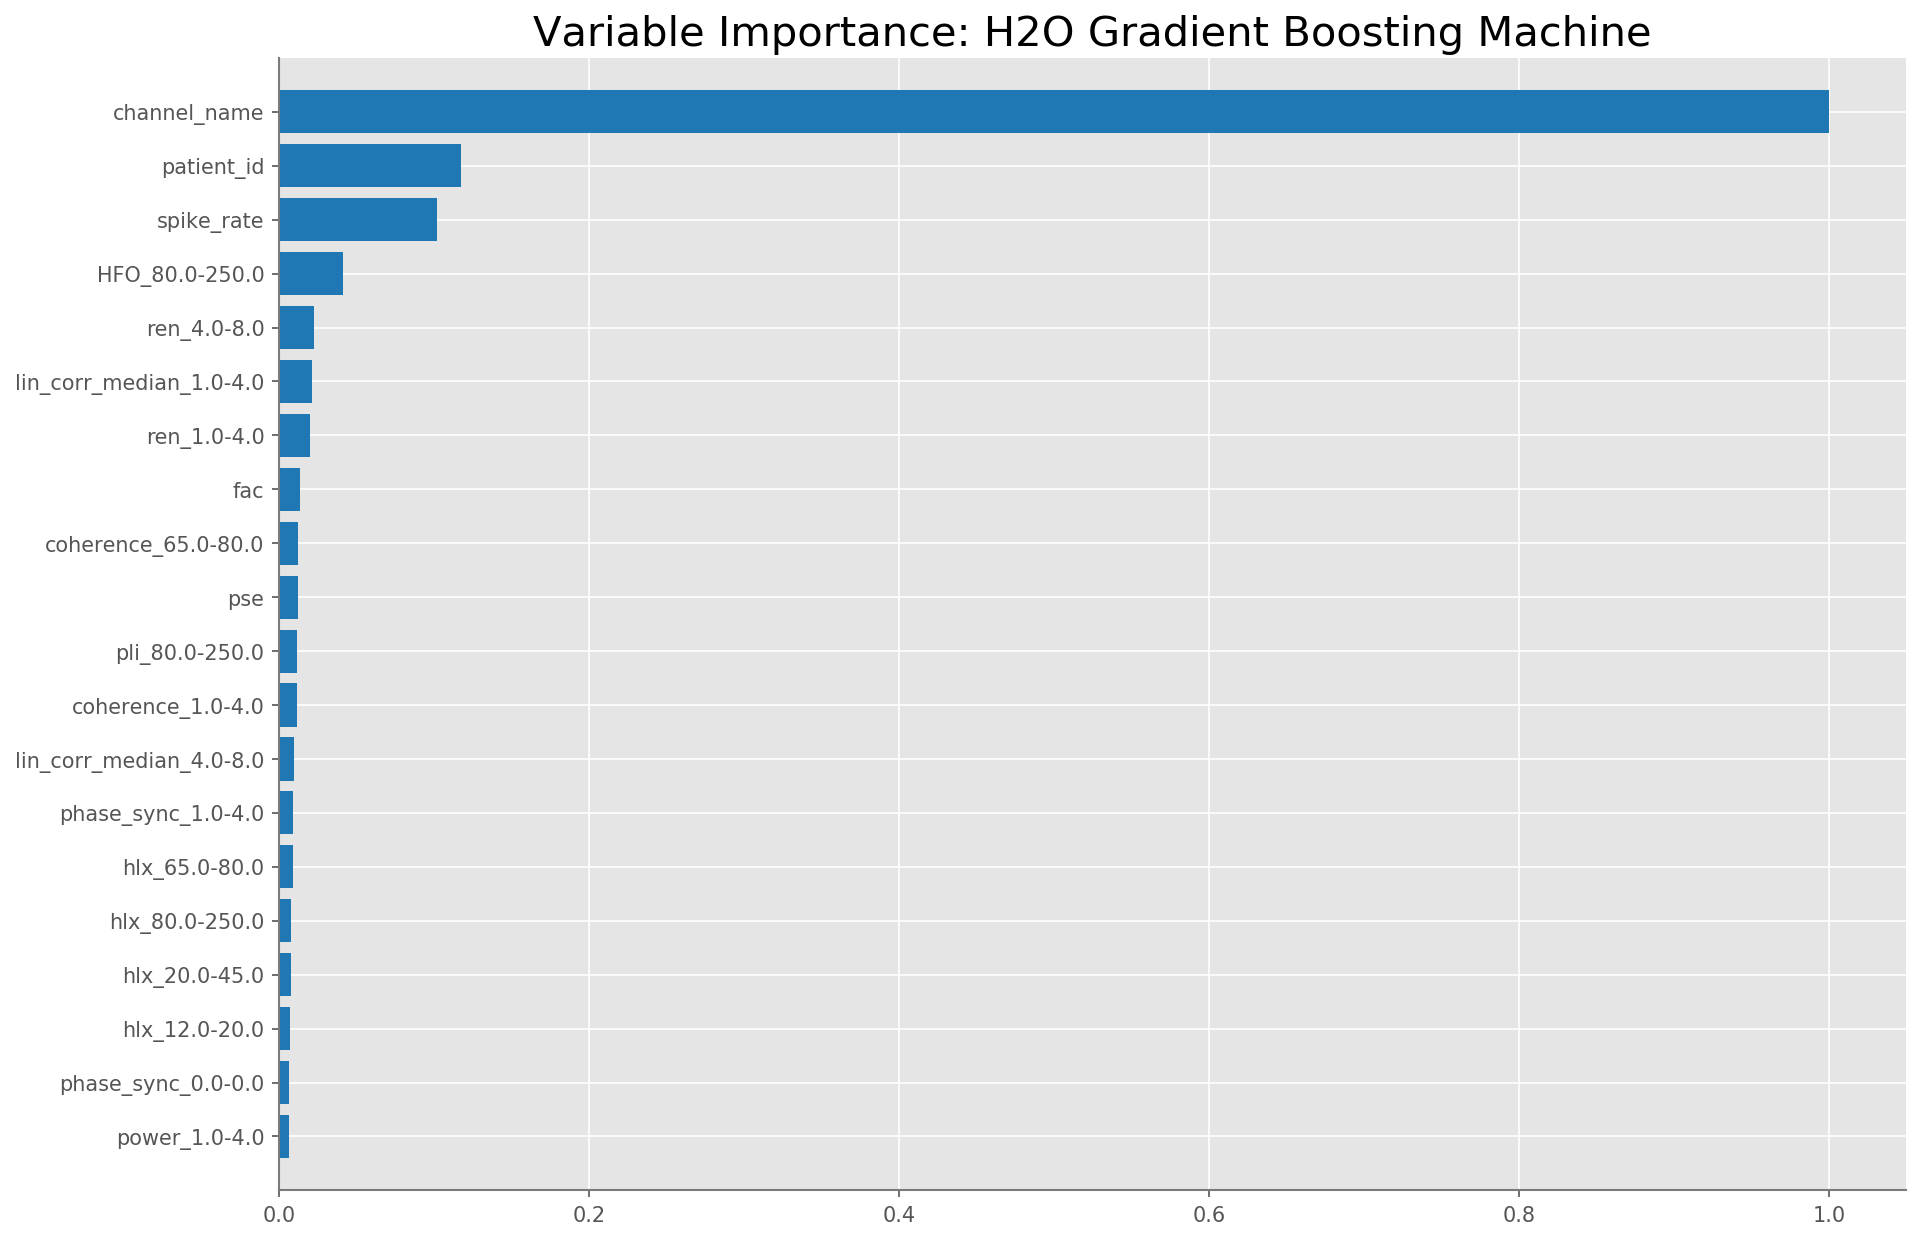

<Figure size 2100x1050 with 0 Axes>

In [87]:
# Show variable importance

model.varimp_plot(num_of_features=20)

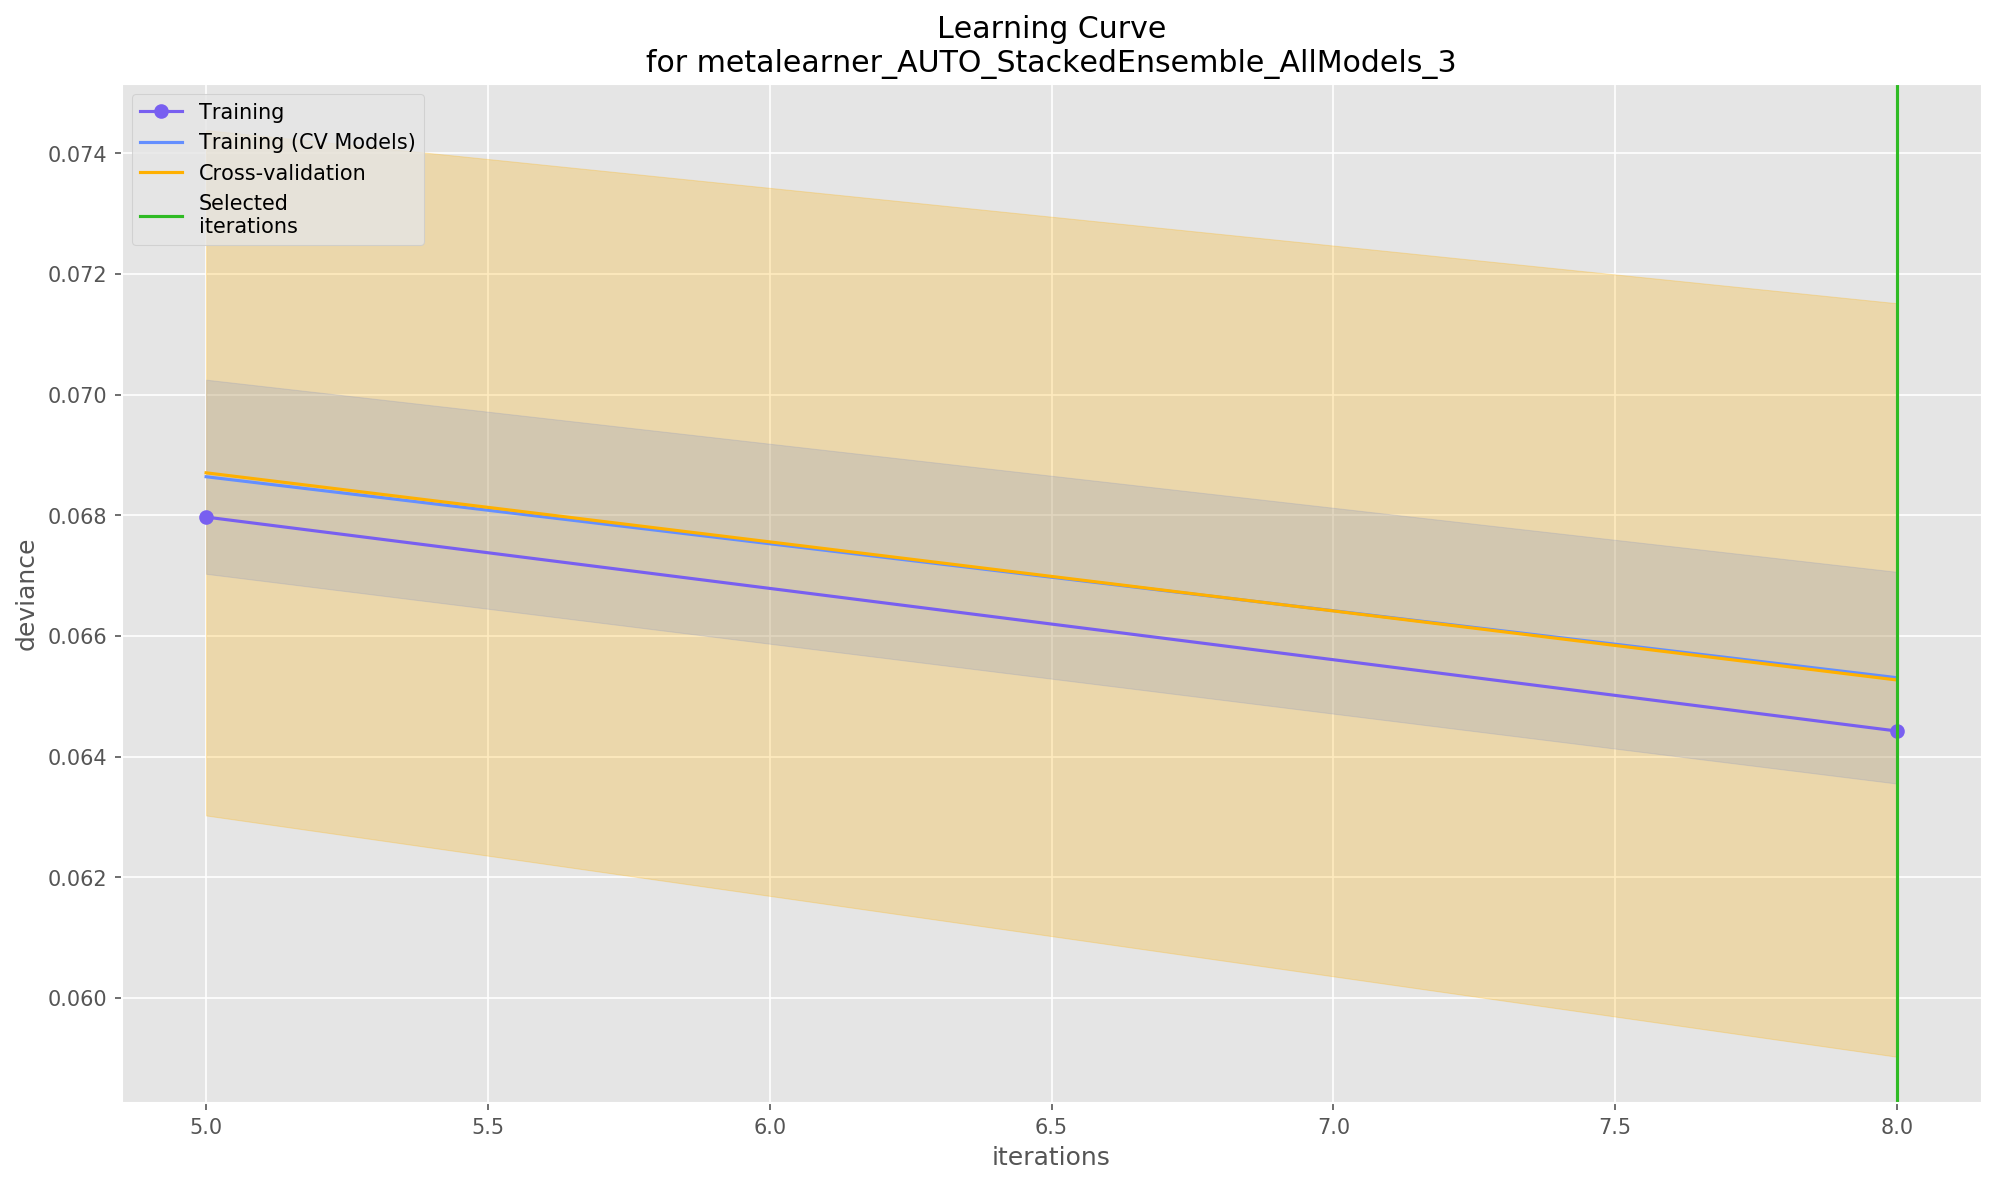

In [90]:
# Learning curve plot 

learning_curve_plot = model.learning_curve_plot()

In [91]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [92]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

patient_id,channel_name,pathology,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,predict,normal,pathologic
583,ra2,normal,16,40,49,0.518898,0.780688,1.059,0.246359,0.417731,0.0172302,0.0471388,0.0136991,22.8359,1.12322,1.05522,1.01696,1.03695,1.06297,1.00613,1.19346,1.06995,0.458209,-0.000984755,-0.00905946,0.168028,0.895323,0.0916576,0.836928,0.666348,0.986216,-99.3333,0.946648,0.942342,0.0795242,0.937776,0.815142,0.998376,-186.042,0.979502,0.974472,0.0350385,0.954852,0.837306,0.99803,-98.88,0.989349,0.996158,0.00660758,0.990449,0.940477,0.999811,-71.76,0.998444,0.991969,0.00839352,0.978559,0.892505,0.995642,-36.325,0.996168,0.996082,0.00432014,0.988694,0.915274,0.992457,-8.10333,0.998027,0.995883,0.00233462,0.988538,0.925232,0.999162,-9.625,0.997981,0.997392,0.00183677,0.990797,0.904985,0.931978,-0.286667,0.998458,0.993981,0.00284724,0.979349,1,0.841924,-0.113333,0.996071,0,0,normal,0.999865,0.00013507
583,ra6,normal,7,49,25,0.472965,0.964676,0.716276,0.190351,0.285159,0.0119757,0.0306428,0.00867748,15.9948,1.12082,1.04599,1.01865,1.03682,1.06514,1.00607,1.19647,1.06968,0.489201,-0.00124926,-0.00812918,0.311882,0.80543,0.15446,0.738541,0.533939,0.984647,-107.542,0.925594,0.950784,0.0875988,0.949821,0.810448,0.998278,-202.5,0.98183,0.954714,0.0519073,0.931563,0.780118,0.999004,-104.74,0.983585,0.990476,0.0136245,0.980753,0.896656,0.999773,-71.48,0.996043,0.979759,0.0162106,0.953787,0.806158,0.995225,-34.7917,0.990522,0.993031,0.00514991,0.979625,0.857497,0.993686,-7.50333,0.996582,0.990899,0.0046373,0.975816,0.870893,0.995709,-9.31667,0.995484,0.994831,0.00303515,0.982651,0.849122,0.914038,-0.568333,0.996949,0.996837,0.00170874,0.987526,1,0.861303,-0.0366667,0.997865,0,0,normal,0.999999,9.91032e-07
583,rca10,normal,6,19,8,0.347042,1.11594,1.01504,0.31053,0.481209,0.0210714,0.0541044,0.0149408,9.20048,1.2172,1.04755,1.01692,1.03646,1.06127,1.00601,1.19697,1.06963,0.566548,0.000565154,-0.0015228,0.884501,0.606213,0.25021,0.519823,0.359725,0.969987,-84.5833,0.814854,0.877887,0.151694,0.858039,0.639372,0.99688,-188.833,0.945312,0.910682,0.0819024,0.872303,0.671488,0.99627,-92.92,0.968876,0.966288,0.0354714,0.943581,0.791414,0.999378,-69.3733,0.986529,0.91726,0.0433487,0.862112,0.651536,0.996284,-30.2333,0.964943,0.931246,0.0329878,0.873649,0.631333,0.963023,-8.09333,0.968114,0.928506,0.0205303,0.87357,0.714121,0.983354,-6.8,0.967883,0.96887,0.015679,0.924473,0.657152,0.846088,-0.553333,0.982275,0.990122,0.00480543,0.96761,1,0.80995,0.1,0.993455,0,0,normal,1,3.95523e-07
583,rca2,normal,4,21,

In [93]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['pathology', 'predict']].head(20)
preds

,pathology,predict
0,normal,normal
1,normal,normal
2,normal,normal
3,normal,normal
4,normal,normal
5,normal,normal
6,normal,normal
7,normal,normal
8,normal,normal
9,normal,normal


In [94]:
# Save the results

#df.to_csv('df.csv')
#preds.to_csv('preds.csv')

## CLASSIFICATION PROBLEM
Predicting "Pathology" in Montreal dataframe split by patients

In [96]:
# Show Montreal dataframe

df_montreal_drop.head()

,patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,normal,11.0,11,34,22,0.533375,0.781969,1.122708,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,normal,11.0,16,40,49,0.518898,0.780688,1.058996,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,normal,11.0,20,35,61,0.466505,0.740345,0.904850,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,normal,11.0,27,37,66,0.444008,0.721173,0.815821,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,normal,11.0,11,58,63,0.588096,0.937518,1.067615,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [110]:
# Split Montreal dataframe based on outcome

test, train = [x for _, x in df_montreal_drop.groupby(df_montreal_drop['outcome'] < 40)]

In [114]:
# Parse dataframes to H2o

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [115]:
# Train dataframe summary describe

train.describe()

Rows:31728
Cols:93




,patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
type,int,enum,enum,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,int,int
mins,473.0,,,11.0,0.0,0.0,0.0,0.0033935233891528,0.0010440002162097,0.0009381938615368,0.0007864608111843,0.0006473726166243,3.366153472794717e-05,3.175480886223986e-05,7.802247174042305e-07,1.3057179148991902,1.0262446661790212,1.0259479647874832,1.0132864632209142,1.0085392993688584,1.000543340841929,1.003492754101753,1.007588633298874,1.0517670094966889,0.0717285592136559,-0.0696039786934852,-0.0550748613497449,0.0003665038410347,-0.7683093715831637,0.0067282185835817,0.0609050278140542,0.0,0.0,-218.58333333333331,0.3285223725189765,-0.8999604328970114,0.0014660500354898,0.4352255032025278,0.0,0.0,-219.0,0.7514204303423564,-0.7575910468026996,0.0002919767181625,0.4026358180555204,0.0,0.0,-111.8,0.82590652714173,-0.7077642927538059,0.0001355320757778,0.4264782655285671,0.0,0.0,-77.29333333333332,0.8343303815523784,-0.4607199422790048,8.274119297719079e-05,0.3751016753353178,0.0,0.0,-47.333333333333336,0.8091164149840673,-0.5501141544617713,4.150115938661732e-05,0.2644617491479342,0.0,0.0,-14.853333333333332,0.7888956743478776,-0.6008368995630493,1.789600557098462e-05,0.2180358095839619,0.0,0.0,-11.148333333333332,0.7887726692358653,-0.5967603107045094,8.82198939166301e-06,0.0996088667559282,0.0,0.0,-3.4,0.7185969988505045,-0.6278105069814288,1.3262518922279773e-05,0.0453562723018694,0.0,0.0,-0.7066666666666667,0.6507014270623525,0.0,0.0
mean,1064.8487140695918,,,16.53605648008067,18.16537443267776,40.39305975794252,18.574823499747865,0.5968592873974446,0.5851141850594175,0.5137745369115202,0.7429700606980479,0.6266165515732459,0.046671690232787354,0.46200682109030244,0.09772284406198314,22.71198347664967,1.3015629264078767,1.06468644039395,1.023024450551539,1.0347636118645633,1.0998740631828048,1.0065655244337255,1.176197320242596,1.076985109611793,0.4270691470955478,0.000445409195218473,0.0005922993346130457,0.2924363559325642,0.7568861543592555,0.17300669062421678,0.7271643893450906,0.06132317338032821,0.11088434948581308,-9.587011062609669,0

In [116]:
# Define X and y

X = train.columns
y = 'pathology'
X.remove(y)

In [117]:
# For binary classification, response should be a factor

train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
y

'pathology'

In [118]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [119]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |██
18:38:17.209: AutoML: XGBoost is not available; skipping it.

█████████████████████████████████████████████████████████████| (done) 100%
Wall time: 10min 57s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_7_20220816_183817

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0004904172699190127
RMSE: 0.02214536678221909
LogLoss: 0.0029438210907497273
Null degrees of freedom: 10059
Residual degrees of freedom: 10055
Null deviance: 9738.018984001508
Residual deviance: 59.22968034588453
AIC: 69.22968034588453
AUC: 0.9999992247533165
AUCPR: 0.9999966565586192
Gini: 0.999998449506633

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7008107095721456: 


,,normal,pathologic,Error,Rate
0,normal,8162.0,2.0,0.0002,(2.0/8164.0)
1,pathologic,0.0,1896.0,0.0,(0.0/1896.0)
2,Total,8162.0,1898.0,0.0002,(2.0/10060.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,7.008107e-01,0.999473,149.0
1,max f2,7.008107e-01,0.999789,149.0
2,max f0point5,7.782522e-01,0.999367,146.0
3,max accuracy,7.008107e-01,0.999801,149.0
4,max precision,9.999990e-01,1.000000,0.0
5,max recall,7.008107e-01,1.000000,149.0
6,max specificity,9.999990e-01,1.000000,0.0
7,max absolute_mcc,7.008107e-01,0.999351,149.0
8,max min_per_class_accuracy,7.008107e-01,0.999755,149.0
9,max mean_per_class_accuracy,7.008107e-01,0.999878,149.0



Gains/Lift Table: Avg response rate: 18.85 %, avg score: 18.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01004,9.999997e-01,5.305907,5.305907,1.000000,9.999998e-01,1.000000,1.000000,0.053270,0.053270,430.590717,430.590717,0.053270
1,2,0.02008,9.999994e-01,5.305907,5.305907,1.000000,9.999996e-01,1.000000,1.000000,0.053270,0.106540,430.590717,430.590717,0.106540
2,3,0.03002,9.999983e-01,5.305907,5.305907,1.000000,9.999991e-01,1.000000,1.000000,0.052743,0.159283,430.590717,430.590717,0.159283
3,4,0.04006,9.999679e-01,5.305907,5.305907,1.000000,9.999881e-01,1.000000,0.999997,0.053270,0.212553,430.590717,430.590717,0.212553
4,5,0.05000,9.999126e-01,5.305907,5.305907,1.000000,9.999394e-01,1.000000,0.999985,0.052743,0.265295,430.590717,430.590717,0.265295
5,6,0.10000,9.994772e-01,5.305907,5.305907,1.000000,9.997315e-01,1.000000,0.999858,0.265295,0.530591,430.590717,430.590717,0.530591
6,7,0.15000,9.979032e-01,5.305907,5.305907,1.000000,9.989016e-01,1.000000,0.999539,0.265295,0.795886,430.590717,430.590717,0.795886
7,8,0.20000,3.188502e-02,4.082278,5.000000,0.769384,7.899976e-01,0.942346,0.947154,0.204114,1.000000,308.227848,400.000000,0.985791
8,9,0.30000,3.589201e-04,0.000000,3.333333,0.000000,4.229051e-03,0.628231,0.632846,0.000000,1.000000,-100.000000,233.333333,0.862567
9,10,0.40000,4.954043e-05,0.000000,2.500000,0.000000,1.456395e-04,0.471173,0.474671,0.000000,1.000000,-100.000000,150.000000,0.739343




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.0031548946778391174
RMSE: 0.05616844913151081
LogLoss: 0.012963848896362772
Null degrees of freedom: 31727
Residual degrees of freedom: 31723
Null deviance: 30772.825989458644
Residual deviance: 822.6339955675961
AIC: 832.6339955675961
AUC: 0.9998702645626036
AUCPR: 0.9994739262187359
Gini: 0.9997405291252073

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5992695826046791: 


,,normal,pathologic,Error,Rate
0,normal,25698.0,30.0,0.0012,(30.0/25728.0)
1,pathologic,85.0,5915.0,0.0142,(85.0/6000.0)
2,Total,25783.0,5945.0,0.0036,(115.0/31728.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.599270,0.990373,174.0
1,max f2,0.343971,0.990954,227.0
2,max f0point5,0.667208,0.993667,163.0
3,max accuracy,0.599270,0.996375,174.0
4,max precision,0.999975,1.000000,0.0
5,max recall,0.006141,1.000000,376.0
6,max specificity,0.999975,1.000000,0.0
7,max absolute_mcc,0.599270,0.988156,174.0
8,max min_per_class_accuracy,0.267435,0.994000,246.0
9,max mean_per_class_accuracy,0.343971,0.994484,227.0



Gains/Lift Table: Avg response rate: 18.91 %, avg score: 18.91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010054,9.999971e-01,5.288000,5.288000,1.000000,9.999986e-01,1.000000,0.999999,0.053167,0.053167,428.800000,428.800000,0.053167
1,2,0.020014,9.998591e-01,5.288000,5.288000,1.000000,9.999635e-01,1.000000,0.999981,0.052667,0.105833,428.800000,428.800000,0.105833
2,3,0.030005,9.995879e-01,5.288000,5.288000,1.000000,9.997249e-01,1.000000,0.999896,0.052833,0.158667,428.800000,428.800000,0.158667
3,4,0.040059,9.993000e-01,5.288000,5.288000,1.000000,9.994454e-01,1.000000,0.999783,0.053167,0.211833,428.800000,428.800000,0.211833
4,5,0.050019,9.989701e-01,5.288000,5.288000,1.000000,9.991346e-01,1.000000,0.999654,0.052667,0.264500,428.800000,428.800000,0.264500
5,6,0.100006,9.963689e-01,5.288000,5.288000,1.000000,9.978933e-01,1.000000,0.998774,0.264333,0.528833,428.800000,428.800000,0.528833
6,7,0.150025,9.848887e-01,5.288000,5.288000,1.000000,9.923550e-01,1.000000,0.996634,0.264500,0.793333,428.800000,428.800000,0.793333
7,8,0.200013,1.037437e-01,4.094366,4.989685,0.774275,7.637150e-01,0.943587,0.938422,0.204667,0.998000,309.436570,398.968547,0.984085
8,9,0.300019,1.135104e-03,0.019999,3.333123,0.003782,1.343419e-02,0.630318,0.630093,0.002000,1.000000,-98.000126,233.312323,0.863223
9,10,0.399994,2.110580e-04,0.000000,2.500039,0.000000,5.141667e-04,0.472776,0.472735,0.000000,1.000000,-100.000000,150.003940,0.739933




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.996567,0.000521,0.997009,0.996967,0.996114,0.995898,0.996844
1,auc,0.999870,0.000041,0.999923,0.999896,0.999818,0.999858,0.999853
2,err,0.003433,0.000521,0.002991,0.003033,0.003886,0.004102,0.003156
3,err_count,21.800000,3.420526,19.000000,19.000000,25.000000,26.000000,20.000000
4,f0point5,0.993524,0.000806,0.992448,0.993851,0.993145,0.993563,0.994615
5,f1,0.990860,0.001550,0.992204,0.992119,0.989330,0.989039,0.991611
6,f2,0.988216,0.003141,0.991959,0.990394,0.985544,0.984556,0.988625
7,lift_top_group,5.289010,0.107346,5.210829,5.181969,5.457167,5.304603,5.290484
8,logloss,0.012961,0.000962,0.011428,0.012806,0.013894,0.013634,0.013045
9,max_per_class_error,0.013537,0.004234,0.008203,0.010753,0.016964,0.018410,0.013356



See the whole table with table.as_data_frame()


In [120]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_7_20220816_183817,0.99987,0.0129638,0.999474,0.00766636,0.0561684,0.00315489
StackedEnsemble_AllModels_3_AutoML_7_20220816_183817,0.99987,0.0127761,0.999472,0.00740516,0.056093,0.00314642
StackedEnsemble_AllModels_1_AutoML_7_20220816_183817,0.999859,0.0131349,0.99943,0.00736629,0.056955,0.00324387
StackedEnsemble_BestOfFamily_3_AutoML_7_20220816_183817,0.999838,0.0141696,0.99934,0.00857183,0.0589866,0.00347942
StackedEnsemble_BestOfFamily_2_AutoML_7_20220816_183817,0.999804,0.0148543,0.999205,0.00835215,0.061438,0.00377463
GBM_4_AutoML_7_20220816_183817,0.999789,0.0635678,0.999154,0.0089078,0.114707,0.0131576
GBM_1_AutoML_7_20220816_183817,0.999762,0.0752954,0.999085,0.0089078,0.128888,0.0166121
StackedEnsemble_BestOfFamily_1_AutoML_7_20220816_183817,0.99976,0.0147915,0.999078,0.0088495,0.0622298,0.00387255
GBM_grid_1_AutoML_7_20220816_183817_model_5,0.999569,0.096742,0.998365,0.0105432,0.15647,0.0244829
GBM_grid_1_AutoML_7_20220816_183817_model_4,0.999551,0.072417,0.998318,0.0109964,0.125987,0.0158727


In [121]:
# Explain a single H2O model (e.g. leader model from AutoML)

# exm = aml.leader.explain(test)

In [122]:
# Leader Gradient Boossting (GB) model 

model = h2o.get_model('GBM_4_AutoML_7_20220816_183817')

In [123]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.12633322369403613
RMSE: 0.3554338527687481
LogLoss: 0.451129963446012
Mean Per-Class Error: 0.3779129171353581
AUC: 0.6561179754874391
AUCPR: 0.2679672093149945
Gini: 0.3122359509748782

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.022404557774519503: 


,,normal,pathologic,Error,Rate
0,normal,4410.0,5750.0,0.5659,(5750.0/10160.0)
1,pathologic,319.0,1361.0,0.1899,(319.0/1680.0)
2,Total,4729.0,7111.0,0.5126,(6069.0/11840.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.022405,0.309635,368.0
1,max f2,0.017460,0.496454,375.0
2,max f0point5,0.362526,0.297283,145.0
3,max accuracy,0.719449,0.862078,41.0
4,max precision,0.881656,1.000000,0.0
5,max recall,0.005877,1.000000,399.0
6,max specificity,0.881656,1.000000,0.0
7,max absolute_mcc,0.697337,0.189410,47.0
8,max min_per_class_accuracy,0.074828,0.595276,318.0
9,max mean_per_class_accuracy,0.022405,0.622087,368.0



Gains/Lift Table: Avg response rate: 14.19 %, avg score: 11.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010051,0.792312,4.619448,4.619448,0.655462,0.826282,0.655462,0.826282,0.046429,0.046429,361.944778,361.944778,0.042393
1,2,0.020017,0.715319,3.762712,4.192887,0.533898,0.754251,0.594937,0.790419,0.037500,0.083929,276.271186,319.288728,0.074480
2,3,0.030068,0.632248,2.250500,3.543606,0.319328,0.670298,0.502809,0.750266,0.022619,0.106548,125.050020,254.360621,0.089126
3,4,0.040034,0.564397,1.493140,3.033153,0.211864,0.595101,0.430380,0.711638,0.014881,0.121429,49.313963,203.315250,0.094854
4,5,0.050084,0.507519,1.243697,2.674054,0.176471,0.536455,0.379427,0.676484,0.012500,0.133929,24.369748,167.405444,0.097708
5,6,0.100000,0.314473,1.741036,2.208333,0.247039,0.399338,0.313345,0.538145,0.086905,0.220833,74.103618,120.833333,0.140814
6,7,0.150000,0.251397,1.000000,1.805556,0.141892,0.273226,0.256194,0.449839,0.050000,0.270833,0.000000,80.555556,0.140814
7,8,0.200000,0.198843,0.964286,1.595238,0.136824,0.225952,0.226351,0.393867,0.048214,0.319048,-3.571429,59.523810,0.138733
8,9,0.300000,0.126283,1.136905,1.442460,0.161318,0.157992,0.204673,0.315242,0.113690,0.432738,13.690476,44.246032,0.154687
9,10,0.400000,0.087340,1.291667,1.404762,0.183277,0.106976,0.199324,0.263176,0.129167,0.561905,29.166667,40.476190,0.188676


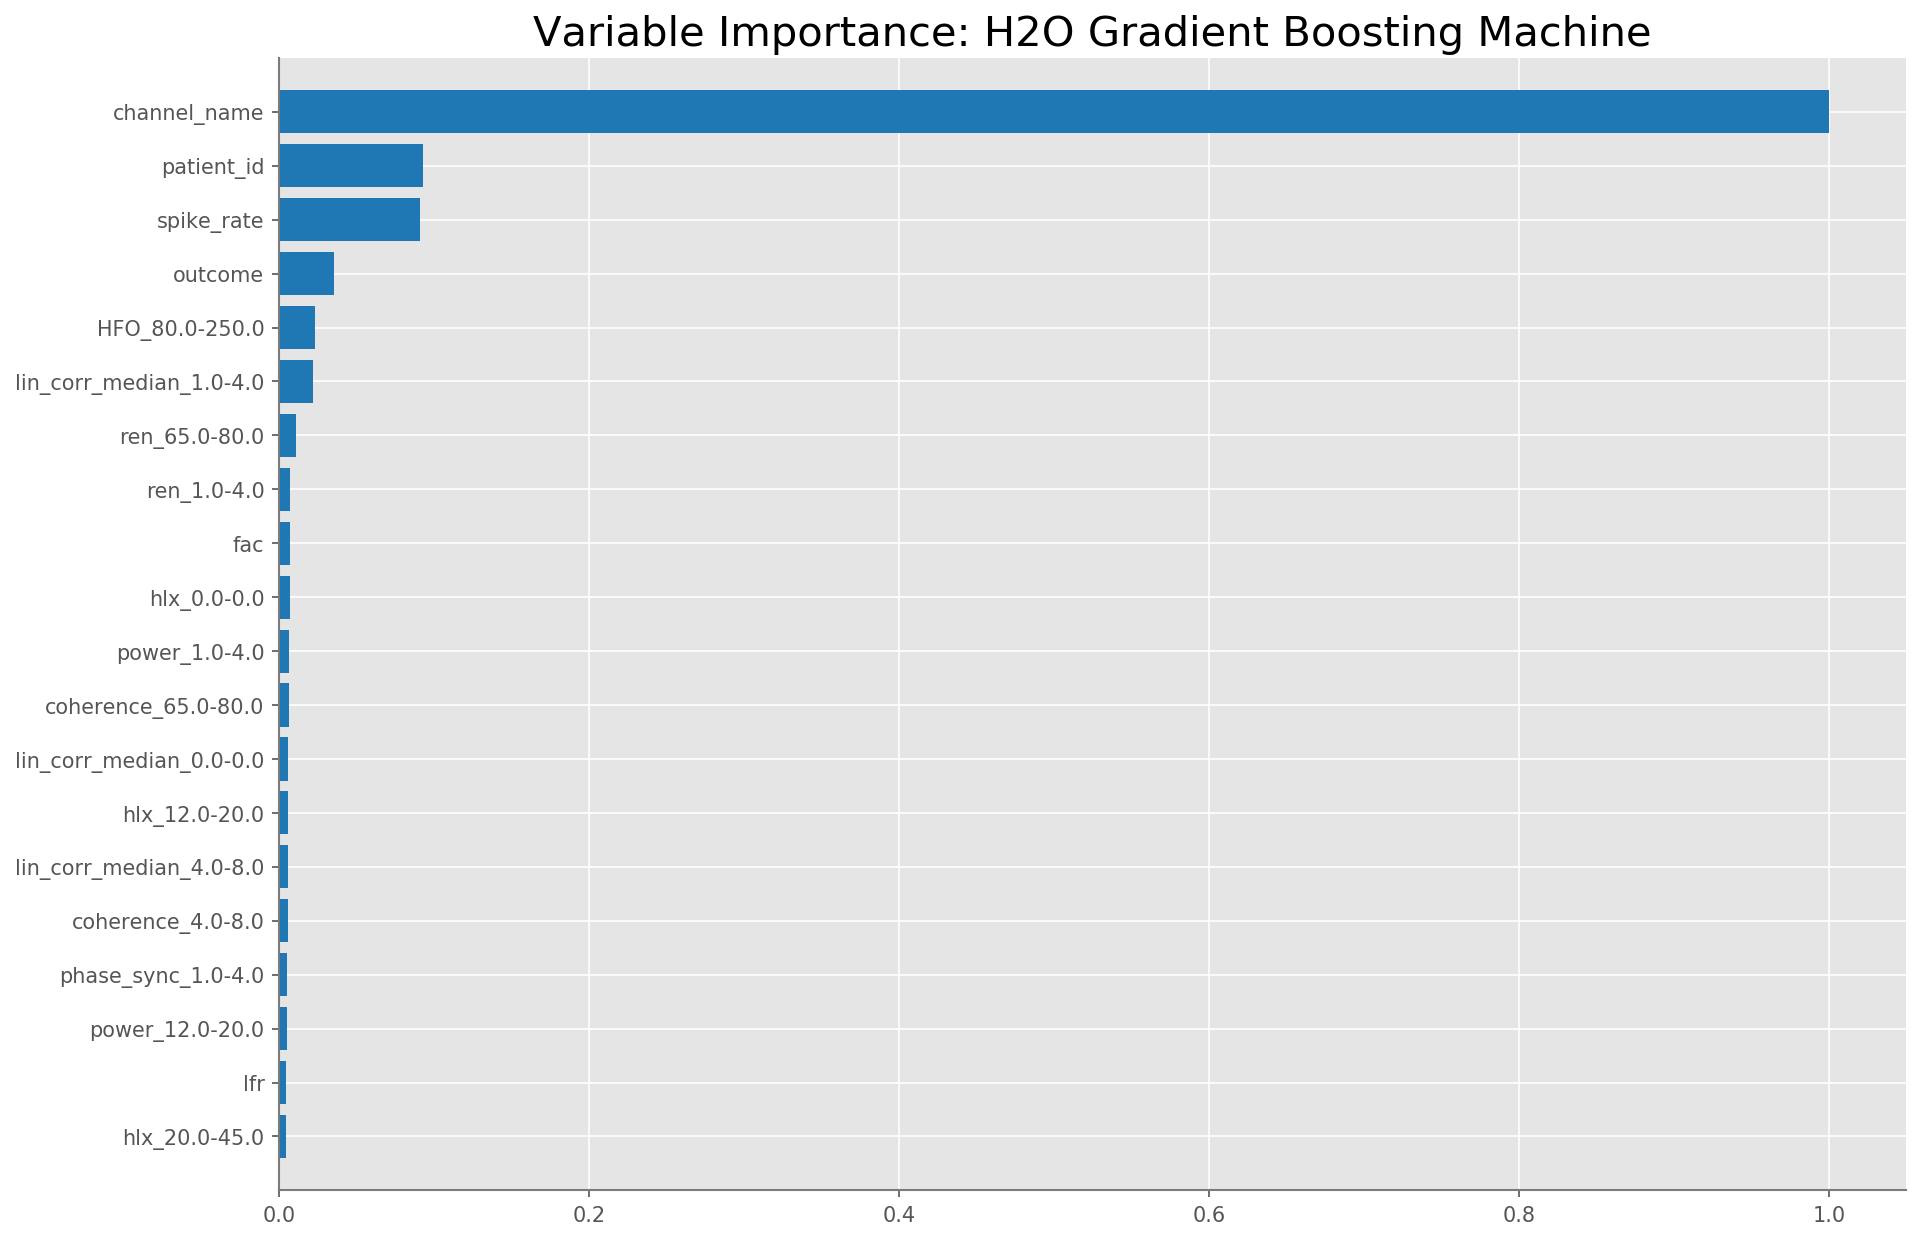

<Figure size 2100x1050 with 0 Axes>

In [124]:
# Show variable importance

model.varimp_plot(num_of_features=20)

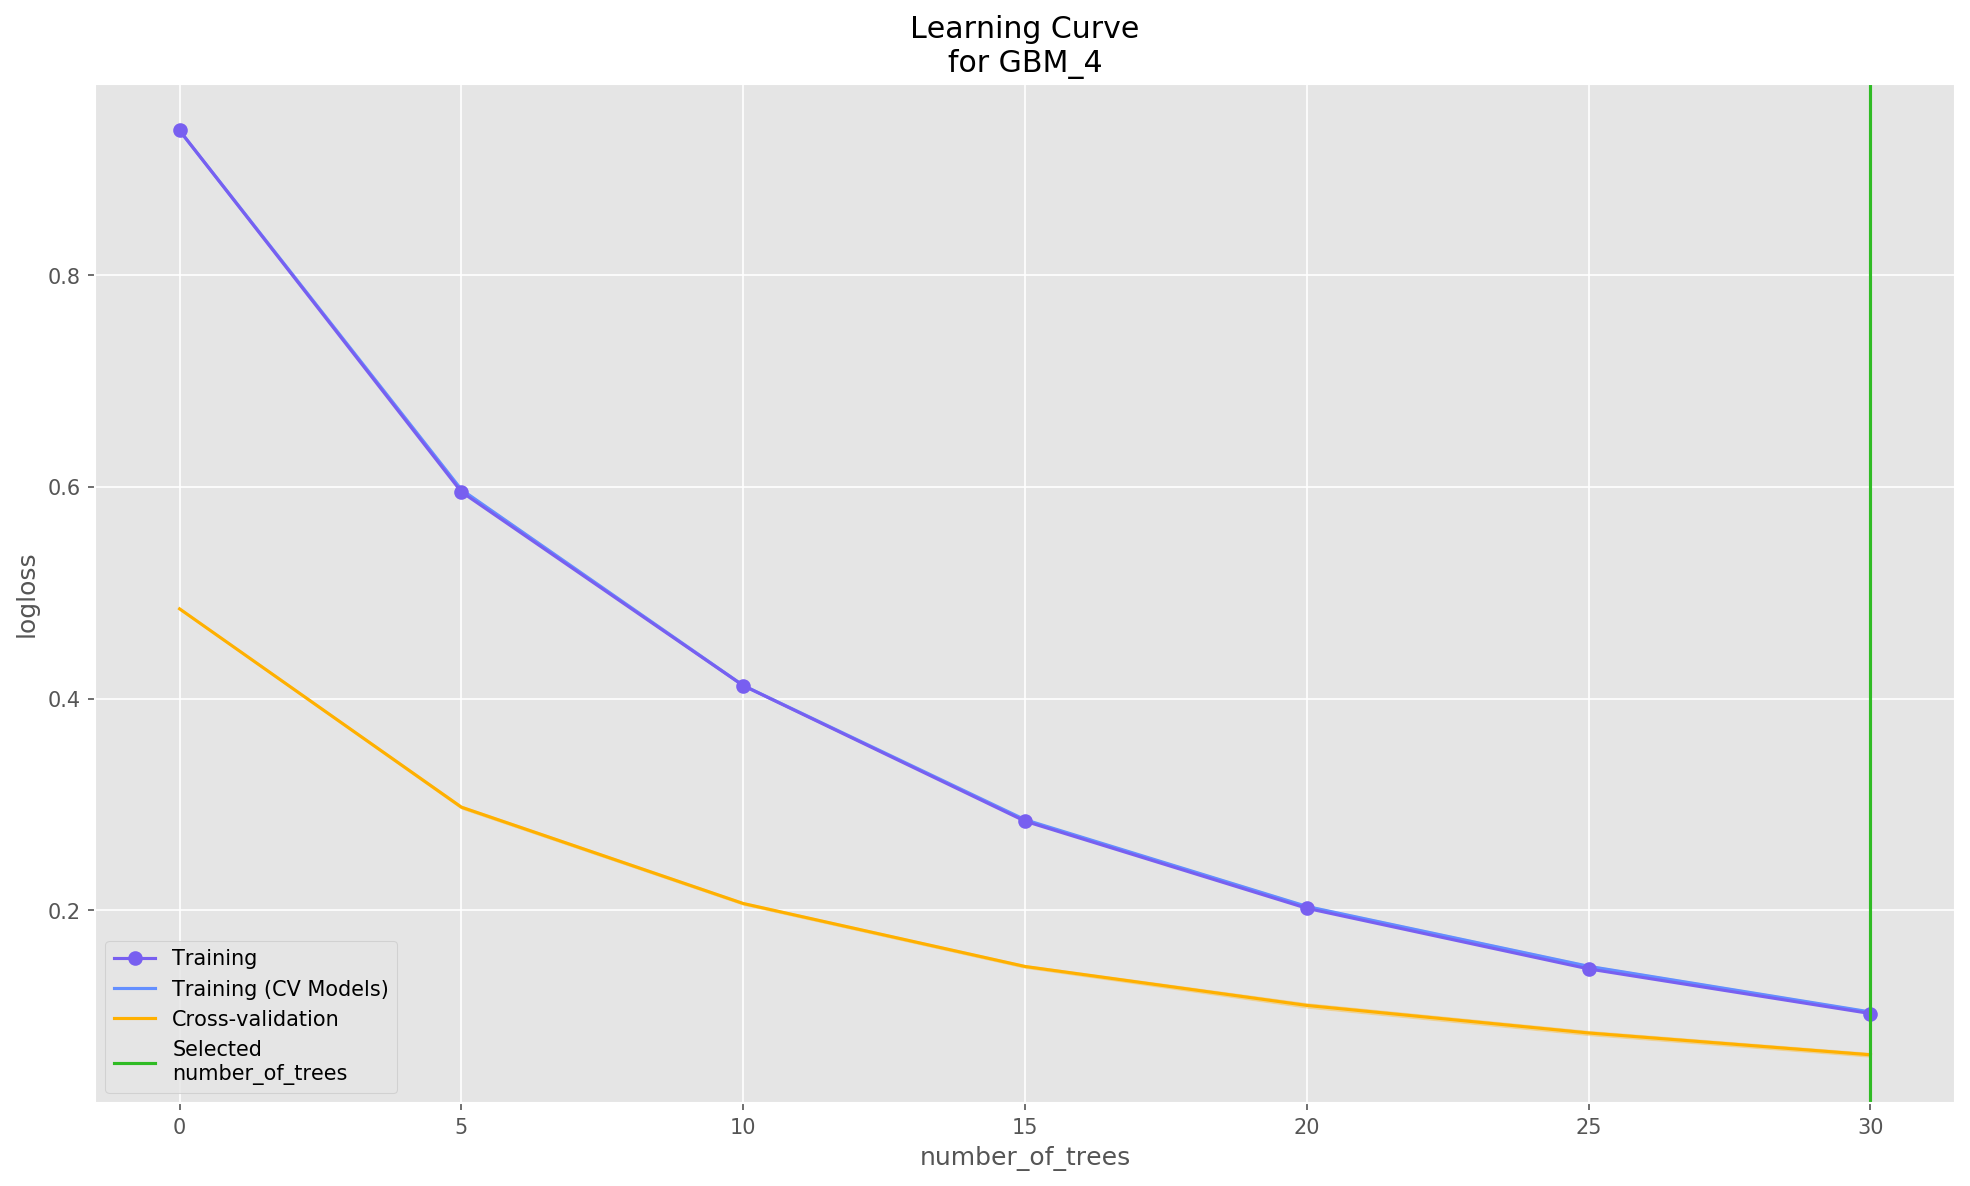

In [125]:
# Learning curve plot 

learning_curve_plot = model.learning_curve_plot()

In [126]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


C:\Users\marek\Anaconda3\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'channel_name' has levels not trained on: ["lfa1", "lfa10", "lfa11", "lfa12", "lfa13", "lfa2", "lfa3", "lfa4", "lfa5", "lfa6", ...124 not listed..., "rl7", "rl8", "rl9", "rtr1", "rtr2", "rtr3", "rtr4", "rtr5", "rtr6", "rtr7"]
  warnings.warn(w)


In [127]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

patient_id,channel_name,pathology,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,predict,normal,pathologic
705,la1,pathologic,41,18,79,0,0.749012,0.264943,0.0796776,0.0712564,0.159454,0.116933,0.880444,0.219092,19.7928,1.26335,1.06779,1.02342,1.0395,1.08918,1.006,1.18713,1.07008,0.410755,-0.000397629,0.00291686,0.0446103,0.635428,0.283754,0.595788,0,0,0,0.856576,0.686121,0.303084,0.706173,0,0,0,0.920428,0.840984,0.112384,0.796272,0,0,0,0.946042,0.899777,0.0640002,0.843309,0,0,0,0.962555,0.936123,0.0403065,0.877458,0,0,0,0.971744,0.970115,0.0211683,0.908701,0,0,0,0.985581,0.994827,0.00239105,0.978369,0,0,0,0.997471,0.997706,0.00160414,0.990918,0,0,0,0.998684,0.997602,0.00133448,0.991951,0,0,0,0.998567,0,0,normal,0.518271,0.481729
705,la10,normal,41,18,78,1,1.62776,0.75011,0.265307,0.265103,0.629562,0.461883,3.39414,0.83365,11.3839,1.28286,1.07257,1.02356,1.03901,1.08985,1.006,1.18819,1.06994,0.500935,0.00146523,0.00156154,0.179623,0.370002,0.355518,0.383244,0,0,0,0.78813,0.807742,0.233354,0.793299,0,0,0,0.940539,0.895345,0.0947938,0.848978,0,0,0,0.959622,0.866416,0.0643952,0.807481,0,0,0,0.953942,0.90625,0.0501307,0.832508,0,0,0,0.961966,0.977209,0.0134925,0.922782,0,0,0,0.988448,0.997391,0.00116583,0.986337,0,0,0,0.998728,0.998666,0.000983747,0.994165,0,0,0,0.999217,0.998008,0.00121462,0.992349,0,0,0,0.998674,0,0,normal,0.999978,2.15166e-05
705,la2,pathologic,41,20,89,0,1.00044,0.400259,0.120875,0.117004,0.275678,0.205115,1.54478,0.384703,17.7149,1.26547,1.06591,1.02383,1.0392,1.08933,1.00599,1.18718,1.07011,0.418325,0.00119715,0.00204119,0.0530767,0.76934,0.19654,0.695976,0,0,0,0.888982,0.827092,0.20447,0.827725,0,0,0,0.953409,0.912873,0.0710426,0.88063,0,0,0,0.969681,0.945161,0.0385817,0.910461,0,0,0,0.979008,0.964314,0.0239697,0.927843,0,0,0,0.984103,0.983124,0.0119211,0.945472,0,0,0,0.99183,0.99699,0.00144893,0.986689,0,0,0,0.998526,0.99864,0.000992403,0.994395,0,0,0,0.999217,0.998521,0.00085799,0.994684,0,0,0,0.999093,0,0,normal,0.792235,0.207765
705,la3,pathologic,41,21,78,1,1.04545,0.447317,0.142192,0.140061,0.332357,0.248281,1.86383,0.4631,14.2278,1.26468,1.06659,1.02388,1.03966,1.08928,1.006,1.18731,1.07003,0.391851,0.000949445,-0.000579545,0.069821,0.898197,0.109108,0.777625,0,0,0,0.915472,0.971055,0.101857,0.953612,0,0,0,0.98799,0.984574,0.0305179,0.967985,0,0,0,0.993419,0.990427,0.0133727,0.977159,0,0,0,0.995635,0.992937,0.00773324,0.979356,0,0,0,0.99677,0.9967,0.00237373,0.98456,0,0,0,0.998342,0.999275,0.000430082,0.995727,0,0,0,0.999636,0.999622,0.000337502,0.998068

In [128]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['pathology', 'predict']].head(20)
preds

,pathology,predict
0,pathologic,normal
1,normal,normal
2,pathologic,normal
3,pathologic,normal
4,normal,normal
5,normal,normal
6,normal,normal
7,normal,normal
8,normal,normal
9,normal,normal


In [129]:
# Save the results

#df.to_csv('df.csv')
#preds.to_csv('preds.csv')